## NEURAL MACHINE TRANSLATION ON DRAVIDIAN LANGUAGES TO ENGLISH

## Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.translate.bleu_score import corpus_bleu
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Dropout, RepeatVector, TimeDistributed,Bidirectional,GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Dataset collection

In [ ]:
arr=[]
fp=open(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\nTe.txt","r",encoding="utf-8")
for i in range(400000):
    k=len(fp.readline())
    if k>450:
        print(i+1, "length = ",k)
        arr.append(i+1)
fp.close()

2141 length =  726
2377 length =  457
2748 length =  526
3545 length =  769
5825 length =  452
5909 length =  503
6081 length =  459
8855 length =  743
10574 length =  503
12892 length =  546
13014 length =  1039
15604 length =  512
16348 length =  1044
19938 length =  507
20395 length =  470
22674 length =  562
25215 length =  530
25331 length =  496
25578 length =  629
26833 length =  583
30067 length =  457
32271 length =  522
33654 length =  545
33999 length =  552
37818 length =  595
40097 length =  677
40929 length =  522
43810 length =  524
43825 length =  567
43991 length =  479
44509 length =  453
46327 length =  752
47201 length =  483
47718 length =  610
50404 length =  1000
50616 length =  478
50781 length =  507
52313 length =  600
53216 length =  496
53905 length =  504
54196 length =  464
54280 length =  515
55068 length =  489
55991 length =  654
57424 length =  569
58086 length =  547
59463 length =  457
60213 length =  522
62003 length =  564
63482 length =  522
63992

In [ ]:
fpe=open(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\F1_En.txt","r",encoding="utf-8")
fpt=open(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\F1_Te.txt","r",encoding="utf-8")
fpne=open(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\nEn.txt","w",encoding="utf-8")
fpnt=open(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\nTe.txt","w",encoding="utf-8")
j=0
for i in range(1,350000):
    if i==arr[j]:
        j+=1
        continue
    fpne.write(fpe.readline())
    fpnt.write(fpt.readline())

fpe.close()
fpt.close()
fpne.close()
fpnt.close()

In [ ]:
len(arr)

338

In [ ]:
fpk=open(r"C:\Users\saive\OneDrive\Desktop\En-Ka Dataset\kan -en.txt","r",encoding="utf-8")
d={"English":[],"Kannada":[]}
for i in range(158):
    s=fpk.readline().split(':')
    d["English"].append(s[0])
    d["Kannada"].append(s[1][:-1])
print(d)
fpk.close()

{'English': ["What's up?", 'How are you?', 'Tom woke up.', 'Give me half.', 'We needed it.', "I'm very busy.", 'Tom liked you.', 'Just go inside.', 'Do you remember?', 'I just got back.', 'See you at 2', 'Can we go inside?', 'I believe in you.', 'Mary is gorgeous.', "How's your family?", 'Where is the book?', 'Tom stayed with me.', "Don't let Tom do it.", 'May I put this here?', "They're useless now.", "We're working on it.", 'I traveled by myself.', 'Tom is very careless.', "What's going on here?", 'You have to tell Tom.', 'You let me down, Tom.', 'Did Tom ever hurt you?', 'I gave Tom a huge hug.', "That's all Tom needed.", 'I must be getting home.', 'I think that went well.', "Let's greet our guests.", 'Stupidity is no excuse.', 'You need to stay awake.', 'Eat a lot of vegetables.', 'I had to get some money.', 'I only wish to help you.', 'Why are you thanking me?', 'He swam across the river.', 'How did it go last night?', "I've never been to Paris.", 'Tom had almost forgotten.', 'Tom

In [ ]:
df=pd.DataFrame(d)
df

English  \
0                                           What's up?   
1                                         How are you?   
2                                         Tom woke up.   
3                                        Give me half.   
4                                        We needed it.   
..                                                 ...   
153  It was because he was sick that he decided to ...   
154  Both my father and I went to the museum for th...   
155  You would've gotten away with it if Tom hadn't...   
156  Any time you want to borrow my car, all you ha...   
157  I forgot Tom was the one who taught you how to...   

                                               Kannada  
0                                               ಆರಾಮಾ?  
1                                            ಹೇಗಿದ್ದೀರ  
2                                         ಟಾಮ್ ಏಳಿದನು.  
3                                      ಅರ್ಧ ನನಗೆ ಕೊಡು.  
4                                     ನಮಗೆ ಬೇಕಾಗಿತ್ತು.  
..                                                 ...  
153  ಅವನಿಗೆ ಹುಷಾರು ಇರಲಿಲ್ಲ ಅಂತ ಅವನು ಮನಗೆ ವಾಪಸ್ಸು ಬರ...  
154  ನಾನು ಮತ್ತು ನನ್ನ ತಂದೆ ಮೊದಲ ಬಾರಿಗೆ ಸಂಗ್ರಾಲಯಕ್ಕೆ ...  
155  ಒಂದು ವೇಳೆ ಟಾಮ್ ನಿನ್ನ ಬಗ್ಗೆ ಹೇಳಲಿಲ್ಲವೆಂದರೆ ತಪ್ಪ...  
156   ಯಾವಾಗಲಾದರು ನೀವು ನನ್ನ ಕಾರನ್ನು ಬೇಕೆಂದರೆ, ಬರಿ ಕೇಳಿ.  
157  ಟಾಮ್ ನಿಮಗೆ ಗಿಟಾರ್ ಭಾರಿಸುವುದಕ್ಕೆ ಹೇಳಿಕೊಟ್ಟನೆಂದು...  

[158 rows x 2 columns]

In [ ]:
df.to_excel(r"C:\Users\saive\OneDrive\Desktop\En-Ka Dataset\kan -en.xlsx",engine="xlsxwriter")

# Data Preprocessing

* ### Load the collected Parallel-Corpus

In [ ]:
dfEK=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\En-Ka Dataset\Final_EN-KA.xlsx",engine="openpyxl")

In [ ]:
dfEK

ENGLISH  \
0        Such videos are plenty on social media channels.   
1       This incident happened within the limits of Mu...   
2       The situation is currently under control, he s...   
3       Choose a Bookmark to be your Home Page. If you...   
4       Several social organisations are also being in...   
...                                                   ...   
500147  It was because he was sick that he decided to ...   
500148  Both my father and I went to the museum for th...   
500149  You would've gotten away with it if Tom hadn't...   
500150  Any time you want to borrow my car, all you ha...   
500151  I forgot Tom was the one who taught you how to...   

                                                  KANNADA  
0       ಸಾಮಾಜಿಕ ಜಾಲತಾಣಗಳಲ್ಲಿ ಅದೆಷ್ಟೊ ವಿಡಿಯೋಗಳು ಹರಿದಾಡು...  
1       ಮುಳಗುಂದ ಪೊಲೀಸ್ ಠಾಣಾ ವ್ಯಾಪ್ತಿಯಲ್ಲಿ ಈ ದುರ್ಘಟನೆ ನ...  
2       ಪ್ರಸ್ತುತ ಪರಿಸ್ಥಿತಿ ನಿಯಂತ್ರಣದಲ್ಲಿದೆ ಎಂದು ತಿಳಿಸಿ...  
3       ನಿಮ್ಮ ನೆಲೆ ಪುಟವಾಗಿಸಲು ಒಂದು ಬುಕ್‌ಮಾರ್ಕ್ ಅನ್ನು ಆ...  
4       ಇದಕ್ಕೆ ಸಾಮಾಜಿಕವಾದ ಹಲವು ವ್ಯವಸ್ಥೆಗಳು ಪೂರಕವಾಗಿ ಕಾ...  
...                                                   ...  
500147  ಅವನಿಗೆ ಹುಷಾರು ಇರಲಿಲ್ಲ ಅಂತ ಅವನು ಮನಗೆ ವಾಪಸ್ಸು ಬರ...  
500148  ನಾನು ಮತ್ತು ನನ್ನ ತಂದೆ ಮೊದಲ ಬಾರಿಗೆ ಸಂಗ್ರಾಲಯಕ್ಕೆ ...  
500149  ಒಂದು ವೇಳೆ ಟಾಮ್ ನಿನ್ನ ಬಗ್ಗೆ ಹೇಳಲಿಲ್ಲವೆಂದರೆ ತಪ್ಪ...  
500150   ಯಾವಾಗಲಾದರು ನೀವು ನನ್ನ ಕಾರನ್ನು ಬೇಕೆಂದರೆ, ಬರಿ ಕೇಳಿ.  
500151  ಟಾಮ್ ನಿಮಗೆ ಗಿಟಾರ್ ಭಾರಿಸುವುದಕ್ಕೆ ಹೇಳಿಕೊಟ್ಟನೆಂದು...  

[500152 rows x 2 columns]

In [ ]:
dfET=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\En-Te Dataset\Final_EN-TE.xlsx",engine="openpyxl")

In [ ]:
dfET

ENGLISH  \
0                                           Rise again.   
1       How do we glorify Jehovahs undeserved kindness?   
2       India also continues to push back economically.   
3                         I remember my childhood days.   
4                    All transa.ctions are made online.   
...                                                 ...   
506759                     I didn't do it deliberately.   
506760                     That book isn't interesting.   
506761           Tom has never seen the Atlantic Ocean.   
506762   Tom didn't even discuss the problem with Mary.   
506763                        I've lost my best friend.   

                                                   TELUGU  
0                                       మళ్లీ ఉదయిస్తాడు.  
1                       యెహోవా కృపను మనమెలా మహిమపరచవచ్చు?  
2            ఆర్థికంగా కూడా భారత్‌ వే గంగా పయనిస్తున్నది.  
3       ‘విద్యార్థులను చూస్తుంటే నాకు చిన్నప్పటి రోజుల...  
4                      ఆర్థిక లావాదేవీలన్నీ ఆన్‌లైన్‌లోనే  
...                                                   ...  
506759                      నేను ఉద్దేశపూర్వకంగా చేయలేదు.  
506760                        ఆ పుస్తకం ఆసక్తికరంగా లేదు.  
506761                టామ్ అట్లాంటిక్ మహాసముద్రం చూడలేదు.  
506762        టామ్ మేరీతో సమస్య గురించి కూడా చర్చించలేదు.  
506763              నేను నా బెస్ట్ ఫ్రెండ్ ని కోల్పోయాను.  

[506764 rows x 2 columns]

In [ ]:
dfEM=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\En-Ml Dataset\Final_EN-MA.xlsx",engine="openpyxl")

In [ ]:
dfEM

ENGLISH  \
0       The passengers were people with health emergen...   
1       By introducing competitive bidding, Government...   
2       This was announced by Minister of State for Ex...   
3                                 No such luck this time.   
4       Modi to visit Maldives for first foreign tour ...   
...                                                   ...   
499991                                      I have to go.   
499992                         They are a family of five.   
499993  The video posted by Kerala Police also went vi...   
499994             The programme has following components   
499995  The project has been described as one of large...   

                                                MALAYALAM  
0       തൊഴില്‍ നഷ്ടപ്പെട്ടവര്‍, രോഗബാധിതര്‍, സന്ദര്‍ശ...  
1       പുനരുല്‍പ്പാദന ഈര്‍ജ്ജ മേഖലകളില്‍ ഗവണ്‍മെന്റ് ...  
2       വിദേശകാര്യ സഹമന്ത്രി വി മുരളീധരന്‍ ലോക്‌സഭയില്...  
3                 ഇത്തവണ അങ്ങനെയല്ലെന്നുള്ള സന്തോഷമുണ്ട്.  
4          രണ്ടാമൂഴത്തിൽ മോദി ആദ്യം പോകുക മാലദ്വീപിലേക്ക്  
...                                                   ...  
499991                            എനിക്ക് ജൂബയില്‍ പോകണം.  
499992                        അഞ്ചുപേര്‍ കുടുംബ സമേതമാണ്.  
499993  കേരളാ പോലീസിന്റെ ഫേസ്ബുക്ക് പേജിൽ പോസ്റ്റ് ചെയ...  
499994                  ഉപകരണം താഴെ ഭാഗങ്ങൾ അടങ്ങുന്നതാണ്  
499995  ജലമെത്തിക്കാന്‍ മനുഷ്യന്‍ നടത്തിയ ഏറ്റവും വലിയ...  

[499996 rows x 2 columns]

* ### Removing the sentences having word length >20.

In [ ]:
newDS=pd.DataFrame()
eng=[]

In [ ]:
# from english-telugu corpus...
for i in range(dfET.shape[0]):
    sent=dfET.loc[i,"ENGLISH"]
    try:
        if len(sent.split())<=20:
            eng.append(sent)
    except:
        pass

In [ ]:
# from english-kannda corpus...
for i in range(dfEK.shape[0]):
    sent=dfEK.loc[i,"ENGLISH"]
    try:
        if len(sent.split())<=20:
            eng.append(sent)
    except:
        pass

In [ ]:
# from english-malayalam corpus...
for i in range(dfEM.shape[0]):
    sent=dfEM.loc[i,"ENGLISH"]
    try:
        if len(sent.split())<=20:
            eng.append(sent)
    except:
        pass

In [ ]:
newDS["ENGLISH"]=eng
newDS

ENGLISH
0                                              Rise again.
1          How do we glorify Jehovahs undeserved kindness?
2          India also continues to push back economically.
3                            I remember my childhood days.
4                       All transa.ctions are made online.
...                                                    ...
1399574      Following this, the two got into an argument.
1399575                                      I have to go.
1399576                         They are a family of five.
1399577             The programme has following components
1399578  The project has been described as one of large...

[1399579 rows x 1 columns]

In [ ]:
ds=newDS.sample(100000,ignore_index=True)
ds

ENGLISH
0                          All men are equal before God.
1                  Tom can't even tie his own shoes yet.
2                                Can I join you? "Sure."
3      In some areas the rain was heavy while in othe...
4                       But fans have not given up hope.
...                                                  ...
99995                   She was under medical treatment.
99996                                  Escape from house
99997           This adversely affects childrens health.
99998                      The principle is very simple.
99999                      Why did the Berlin Wall fall?

[100000 rows x 1 columns]

In [ ]:
newENG=[]

In [ ]:
# Removing empty sentences and Converting to lowercase..
for i in range(ds.shape[0]):
    sent=ds.loc[i,"ENGLISH"]
    newENG.append(sent.lower())

In [ ]:
nds=pd.DataFrame(newENG,columns=["ENGLISH"])
nds

ENGLISH
0                          all men are equal before god.
1                  tom can't even tie his own shoes yet.
2                                can i join you? "sure."
3      in some areas the rain was heavy while in othe...
4                       but fans have not given up hope.
...                                                  ...
99995                   she was under medical treatment.
99996                                  escape from house
99997           this adversely affects childrens health.
99998                      the principle is very simple.
99999                      why did the berlin wall fall?

[100000 rows x 1 columns]

In [ ]:
nds.to_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\new.xlsx")

* ### Data Fine-tuning (Preparation of dataset)

In [ ]:
from googletrans import Translator
gt=Translator()

In [ ]:
tel1=nds["ENGLISH"][:500].apply(lambda s: gt.translate(s,dest='te',src='en').text)
tel1

0               పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.
1                టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.
2                         నేను మీతో కలవచ్చా?"ఖచ్చితంగా."
3      కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...
4                       కానీ అభిమానులు ఆశను వదులుకోలేదు.
                             ...                        
495                                        మార్గం ఏమిటి?
496    మరియు వారు దానిని విక్రయించరు, మార్పిడి చేయరు,...
497                             అయితే ఇది పట్టింపు ఉందా?
498    వెబ్ బ్రౌజర్ సృష్టికర్తల కోసం క్రెడిట్లను ప్రద...
499              మీరు మొత్తం రామ్ను బలిపీఠం మీద కాల్చాలి
Name: ENGLISH, Length: 500, dtype: object

In [ ]:
nds[:500]

ENGLISH
0                        all men are equal before god.
1                tom can't even tie his own shoes yet.
2                              can i join you? "sure."
3    in some areas the rain was heavy while in othe...
4                     but fans have not given up hope.
..                                                 ...
495                                   what is the way?
496  and they shall not sell of it, neither exchang...
497                              did it matter though?
498       display credits for the web browser creators
499          you shall burn the whole ram on the altar

[500 rows x 1 columns]

In [ ]:
tel1.to_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\tmp.xlsx")

**Similarly, as above we convert all the 100000 `English` sentences to `Telugu`, `Kannada`, `Malayalam` to create the accurate dataset for training the model.**

In [ ]:
s1=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\new.xlsx",engine="openpyxl")

In [ ]:
s2=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\PSV3.xlsx",engine="openpyxl")

In [ ]:
s1

ENGLISH  \
0                          all men are equal before god.   
1                  tom can't even tie his own shoes yet.   
2                                can i join you? "sure."   
3      in some areas the rain was heavy while in othe...   
4                       but fans have not given up hope.   
...                                                  ...   
49995  i want every child in the world without educat...   
49996  in india, the device comes with snapdragon 855...   
49997  on saturday, fuel prices were raised for the 1...   
49998     and by this city (of makkah), a haven of peace   
49999    many companies have held off from cutting jobs.   

                                                  TELUGU  \
0               పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                         నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3      కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                       కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                  ...   
49995  విద్య లేకుండా ప్రపంచంలోని ప్రతి బిడ్డకు సహాయం ...   
49996  భారతదేశంలో, ఈ పరికరం స్నాప్‌డ్రాగన్ 855 ప్రాసె...   
49997      శనివారం, వరుసగా 14 వ రోజు ఇంధన ధరలను పెంచారు.   
49998             మరియు ఈ నగరం (మక్కా), శాంతి స్వర్గధామం   
49999  చాలా కంపెనీలు ఉద్యోగాలు తగ్గించకుండా నిలిచిపోయ...   

                                                 KANNADA  \
0                       ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1      ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                     ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3      ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                 ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                  ...   
49995  ಶಿಕ್ಷಣವಿಲ್ಲದೆ ವಿಶ್ವದ ಪ್ರತಿ ಮಗುವಿಗೆ ಸಹಾಯ ಮಾಡಬೇಕ...   
49996  ಭಾರತದಲ್ಲಿ, ಸಾಧನವು ಸ್ನಾಪ್‌ಡ್ರಾಗನ್ 855 ಪ್ರೊಸೆಸರ್...   
49997  ಶನಿವಾರ, ಸತತ 14 ನೇ ದಿನ ಇಂಧನ ಬೆಲೆಗಳನ್ನು ಹೆಚ್ಚಿಸಲ...   
49998         ಮತ್ತು ಈ ನಗರದಿಂದ (ಮಕ್ಕಾದ), ಶಾಂತಿಯ ಆಶ್ರಯ ತಾಣ   
49999  ಅನೇಕ ಕಂಪನಿಗಳು ಉದ್ಯೋಗಗಳನ್ನು ಕಡಿತಗೊಳಿಸುವುದರಿಂದ ತ...   

                                               MALAYALAM  
0                 എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1      ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2             എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3      ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                    എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                  ...  
49995  ലോകത്തിലെ ഓരോ കുട്ടിയും വിദ്യാഭ്യാസമില്ലാതെ സഹ...  
49996  ഇന്ത്യയിൽ, സ്നാപ്ഡ്രാഗൺ 855 പ്രോസസറും 8/256 ജി...  
49997  തുടർച്ചയായ 14-ാം സ്ഥാനത്തേക്ക് ശനിയാഴ്ച ഇന്ധന ...  
49998   ഈ നഗരത്തിലൂടെ (മക്കയുടെ), സമാധാനത്തിന്റെ സങ്കേതം  
49999   പല കമ്പനികളും ജോലി മുറിക്കുന്നതിൽ നിന്ന് തടഞ്ഞു.  

[50000 rows x 4 columns]

In [ ]:
s2

ENGLISH  \
0      the government is attempting to end the protests.   
1                             don't force me to do that.   
2                                       awareness needed   
3      around 20 kg ganja was seized from these vehic...   
4      mahesh babu was last seen on screens in this y...   
...                                                  ...   
19996                   she was under medical treatment.   
19997                                  escape from house   
19998           this adversely affects childrens health.   
19999                      the principle is very simple.   
20000                      why did the berlin wall fall?   

                                                  TELUGU  \
0      నిరసనలను అంతం చేయడానికి ప్రభుత్వం ప్రయత్నిస్తో...   
1                      అలా చేయమని నన్ను బలవంతం చేయవద్దు.   
2                                           అవగాహన అవసరం   
3      ఈ వాహనాల నుండి సుమారు 20 కిలోల గంజా స్వాధీనం చ...   
4      మహేష్ బాబు వస్ లాస్ట్ సీన్ ఆన్ స్క్రీన్స్ ఇన్ ...   
...                                                  ...   
19996                          ఆమె వైద్య చికిత్సలో ఉంది.   
19997                           ఇంటి నుండి తప్పించుకోండి   
19998  ఇది పిల్లల ఆరోగ్యాన్ని ప్రతికూలంగా ప్రభావితం చ...   
19999                                 సూత్రం చాలా సులభం.   
20000                    బెర్లిన్ గోడ ఎందుకు పడిపోయింది?   

                                                 KANNADA  \
0      ಪ್ರತಿಭಟನೆಯನ್ನು ಕೊನೆಗೊಳಿಸಲು ಸರ್ಕಾರ ಪ್ರಯತ್ನಿಸುತ್...   
1                    ಅದನ್ನು ಮಾಡಲು ನನ್ನನ್ನು ಒತ್ತಾಯಿಸಬೇಡಿ.   
2                                        ಅರಿವು ಅಗತ್ಯವಿದೆ   
3      ಈ ವಾಹನಗಳಿಂದ ಸುಮಾರು 20 ಕೆಜಿ ಗಾಂಜಾವನ್ನು ವಶಪಡಿಸಿಕ...   
4      ಮಹೇಶ್ ಬಾಬು ವಾಸ್ ಈ ವರ್ಷಗಳಲ್ಲಿ ಪರದೆಯ ಕೊನೆಯ ದೃಶ್ಯ...   
...                                                  ...   
19996                  ಅವಳು ವೈದ್ಯಕೀಯ ಚಿಕಿತ್ಸೆಯಲ್ಲಿದ್ದಳು.   
19997                              ಮನೆಯಿಂದ ತಪ್ಪಿಸಿಕೊಳ್ಳಿ   
19998  ಇದು ಮಕ್ಕಳ ಆರೋಗ್ಯದ ಮೇಲೆ ಪ್ರತಿಕೂಲ ಪರಿಣಾಮ ಬೀರುತ್ತದೆ.   
19999                            ತತ್ವವು ತುಂಬಾ ಸರಳವಾಗಿದೆ.   
20000                         ಬರ್ಲಿನ್ ಗೋಡೆ ಏಕೆ ಕುಸಿಯಿತು?   

                                               MALAYALAM  
0       പ്രതിഷേധം അവസാനിപ്പിക്കാൻ സർക്കാർ ശ്രമിക്കുന്നു.  
1                     അത് ചെയ്യാൻ എന്നെ നിർബന്ധിക്കരുത്.  
2                                       അവബോധം ആവശ്യമാണ്  
3           ഈ വാഹനങ്ങളിൽ നിന്ന് 20 കിലോ ഗഞ്ചയെ പിടികൂടി.  
4      ഈ വർഷങ്ങളിലെ സ്ക്രീനിൽ അവസാന രംഗം ശരിയല്ല മഹേഷ...  
...                                                  ...  
19996                      അവൾ വൈദ്യചികിത്സയിലായിരുന്നു.  
19997                         വീട്ടിൽ നിന്ന് രക്ഷപ്പെടുക  
19998  ഇത് കുട്ടികളുടെ ആരോഗ്യത്തെ പ്രതികൂലമായി ബാധിക്...  
19999                               തത്വം വളരെ ലളിതമാണ്.  
20000         എന്തുകൊണ്ടാണ് ബെര് ലിന് മതില് തകര് ന്നത് ?  

[20001 rows x 4 columns]

In [ ]:
ns12=pd.concat([s1,s2],ignore_index=True)
ns12

ENGLISH  \
0                          all men are equal before god.   
1                  tom can't even tie his own shoes yet.   
2                                can i join you? "sure."   
3      in some areas the rain was heavy while in othe...   
4                       but fans have not given up hope.   
...                                                  ...   
69996                   she was under medical treatment.   
69997                                  escape from house   
69998           this adversely affects childrens health.   
69999                      the principle is very simple.   
70000                      why did the berlin wall fall?   

                                                  TELUGU  \
0               పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                         నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3      కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                       కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                  ...   
69996                          ఆమె వైద్య చికిత్సలో ఉంది.   
69997                           ఇంటి నుండి తప్పించుకోండి   
69998  ఇది పిల్లల ఆరోగ్యాన్ని ప్రతికూలంగా ప్రభావితం చ...   
69999                                 సూత్రం చాలా సులభం.   
70000                    బెర్లిన్ గోడ ఎందుకు పడిపోయింది?   

                                                 KANNADA  \
0                       ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1      ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                     ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3      ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                 ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                  ...   
69996                  ಅವಳು ವೈದ್ಯಕೀಯ ಚಿಕಿತ್ಸೆಯಲ್ಲಿದ್ದಳು.   
69997                              ಮನೆಯಿಂದ ತಪ್ಪಿಸಿಕೊಳ್ಳಿ   
69998  ಇದು ಮಕ್ಕಳ ಆರೋಗ್ಯದ ಮೇಲೆ ಪ್ರತಿಕೂಲ ಪರಿಣಾಮ ಬೀರುತ್ತದೆ.   
69999                            ತತ್ವವು ತುಂಬಾ ಸರಳವಾಗಿದೆ.   
70000                         ಬರ್ಲಿನ್ ಗೋಡೆ ಏಕೆ ಕುಸಿಯಿತು?   

                                               MALAYALAM  
0                 എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1      ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2             എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3      ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                    എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                  ...  
69996                      അവൾ വൈദ്യചികിത്സയിലായിരുന്നു.  
69997                         വീട്ടിൽ നിന്ന് രക്ഷപ്പെടുക  
69998  ഇത് കുട്ടികളുടെ ആരോഗ്യത്തെ പ്രതികൂലമായി ബാധിക്...  
69999                               തത്വം വളരെ ലളിതമാണ്.  
70000         എന്തുകൊണ്ടാണ് ബെര് ലിന് മതില് തകര് ന്നത് ?  

[70001 rows x 4 columns]

In [ ]:
ns12.to_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\newset.xlsx")

In [ ]:
s3=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\PSV2.xlsx",engine="openpyxl")

In [ ]:
s3

ENGLISH  \
0                                      not one had gone.   
1                                        it was lengthy.   
2                                            pure water.   
3                      i have plenty of time to do that.   
4                            i was completely exhausted.   
...                                                  ...   
29993                            does anyone believe it?   
29994    it raised expectations on the film furthermore.   
29995          however, the doctors deny the allegation.   
29996  the state government promulgates ordinance all...   
29997  he later served as a lecturer in the brd medic...   

                                                  TELUGU  \
0                                   ఒకరు కూడా వెళ్ళలేదు.   
1                                      ఇది పొడవుగా ఉంది.   
2                                            శుద్ధ నీరు.   
3                     అలా చేయడానికి నాకు చాలా సమయం ఉంది.   
4                               నేను పూర్తిగా అయిపోయాను.   
...                                                  ...   
29993                                  ఎవరైనా నమ్ముతారా?   
29994             ఇది ఈ చిత్రంపై ఇంకా అంచనాలను పెంచింది.   
29995               అయితే, వైద్యులు ఈ ఆరోపణను ఖండించారు.   
29996     రాష్ట్ర ప్రభుత్వం ఆర్డినెన్స్‌ను ప్రకటిస్తుంది   
29997  తరువాత అతను గోరఖ్పూర్ లోని BRD మెడికల్ కాలేజీల...   

                                                 KANNADA  \
0                                        ಒಬ್ಬರು ಹೋಗಿಲ್ಲ.   
1                                   ಇದು ಸುದೀರ್ಘವಾಗಿತ್ತು.   
2                                           ಶುದ್ಧ ನೀರು.   
3                     ಅದನ್ನು ಮಾಡಲು ನನಗೆ ಸಾಕಷ್ಟು ಸಮಯವಿದೆ.   
4                            ನಾನು ಸಂಪೂರ್ಣವಾಗಿ ದಣಿದಿದ್ದೆ.   
...                                                  ...   
29993                       ಯಾರಾದರೂ ಇದನ್ನು ನಂಬುತ್ತಾರೆಯೇ?   
29994         ಇದು ಚಿತ್ರದ ಮೇಲೆ ನಿರೀಕ್ಷೆಗಳನ್ನು ಹೆಚ್ಚಿಸಿತು.   
29995           ಆದರೆ, ವೈದ್ಯರು ಆರೋಪವನ್ನು ನಿರಾಕರಿಸುತ್ತಾರೆ.   
29996  ರಾಜ್ಯ ಸರ್ಕಾರವು ರೈತರಿಗೆ ತಮ್ಮ ಉತ್ಪನ್ನಗಳನ್ನು ರಾಜ್...   
29997  ನಂತರ ಅವರು ಗೋರಖ್‌ಪುರದ ಬಿಆರ್‌ಡಿ ವೈದ್ಯಕೀಯ ಕಾಲೇಜಿನ...   

                                               MALAYALAM  
0                                    ആരും പോയിരുന്നില്ല.  
1                             അത് ദൈർഘ്യമേറിയതായിരുന്നു.  
2                                       ശുദ്ധമായ വെള്ളം.  
3                  അത് ചെയ്യാൻ എനിക്ക് ധാരാളം സമയമുണ്ട്.  
4                               ഞാൻ പൂർണ്ണമായും തീർന്നു.  
...                                                  ...  
29993                ആരെങ്കിലും അത് വിശ്വസിക്കുന്നുണ്ടോ?  
29994                 ഇത് ചിത്രത്തിൽ പ്രതീക്ഷകൾ ഉയർത്തി.  
29995   എന്നിരുന്നാലും, ഡോക്ടർമാർ ആരോപണം നിഷേധിക്കുന്നു.  
29996  കൃഷിക്കാർക്ക് അവരുടെ ഉൽപ്പന്നങ്ങൾ സംസ്ഥാനത്തുട...  
29997  പിന്നീട് ഗോരഖ്പൂരിലെ ബിആർഡി മെഡിക്കൽ കോളേജിൽ ഒ...  

[29998 rows x 4 columns]

In [ ]:
newDataSet = pd.concat([ns12,s3],ignore_index=True)
newDataSet

ENGLISH  \
0                          all men are equal before god.   
1                  tom can't even tie his own shoes yet.   
2                                can i join you? "sure."   
3      in some areas the rain was heavy while in othe...   
4                       but fans have not given up hope.   
...                                                  ...   
99994                            does anyone believe it?   
99995    it raised expectations on the film furthermore.   
99996          however, the doctors deny the allegation.   
99997  the state government promulgates ordinance all...   
99998  he later served as a lecturer in the brd medic...   

                                                  TELUGU  \
0               పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                         నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3      కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                       కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                  ...   
99994                                  ఎవరైనా నమ్ముతారా?   
99995             ఇది ఈ చిత్రంపై ఇంకా అంచనాలను పెంచింది.   
99996               అయితే, వైద్యులు ఈ ఆరోపణను ఖండించారు.   
99997     రాష్ట్ర ప్రభుత్వం ఆర్డినెన్స్‌ను ప్రకటిస్తుంది   
99998  తరువాత అతను గోరఖ్పూర్ లోని BRD మెడికల్ కాలేజీల...   

                                                 KANNADA  \
0                       ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1      ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                     ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3      ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                 ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                  ...   
99994                       ಯಾರಾದರೂ ಇದನ್ನು ನಂಬುತ್ತಾರೆಯೇ?   
99995         ಇದು ಚಿತ್ರದ ಮೇಲೆ ನಿರೀಕ್ಷೆಗಳನ್ನು ಹೆಚ್ಚಿಸಿತು.   
99996           ಆದರೆ, ವೈದ್ಯರು ಆರೋಪವನ್ನು ನಿರಾಕರಿಸುತ್ತಾರೆ.   
99997  ರಾಜ್ಯ ಸರ್ಕಾರವು ರೈತರಿಗೆ ತಮ್ಮ ಉತ್ಪನ್ನಗಳನ್ನು ರಾಜ್...   
99998  ನಂತರ ಅವರು ಗೋರಖ್‌ಪುರದ ಬಿಆರ್‌ಡಿ ವೈದ್ಯಕೀಯ ಕಾಲೇಜಿನ...   

                                               MALAYALAM  
0                 എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1      ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2             എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3      ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                    എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                  ...  
99994                ആരെങ്കിലും അത് വിശ്വസിക്കുന്നുണ്ടോ?  
99995                 ഇത് ചിത്രത്തിൽ പ്രതീക്ഷകൾ ഉയർത്തി.  
99996   എന്നിരുന്നാലും, ഡോക്ടർമാർ ആരോപണം നിഷേധിക്കുന്നു.  
99997  കൃഷിക്കാർക്ക് അവരുടെ ഉൽപ്പന്നങ്ങൾ സംസ്ഥാനത്തുട...  
99998  പിന്നീട് ഗോരഖ്പൂരിലെ ബിആർഡി മെഡിക്കൽ കോളേജിൽ ഒ...  

[99999 rows x 4 columns]

In [ ]:
newDataSet.to_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\prefinalDS.xlsx")

In [ ]:
s4=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\prefinalDS.xlsx",engine="openpyxl")
s4

ENGLISH  \
0                          all men are equal before god.   
1                  tom can't even tie his own shoes yet.   
2                                can i join you? "sure."   
3      in some areas the rain was heavy while in othe...   
4                       but fans have not given up hope.   
...                                                  ...   
99994                            does anyone believe it?   
99995    it raised expectations on the film furthermore.   
99996          however, the doctors deny the allegation.   
99997  the state government promulgates ordinance all...   
99998  he later served as a lecturer in the brd medic...   

                                                  TELUGU  \
0               పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                         నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3      కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                       కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                  ...   
99994                                  ఎవరైనా నమ్ముతారా?   
99995             ఇది ఈ చిత్రంపై ఇంకా అంచనాలను పెంచింది.   
99996               అయితే, వైద్యులు ఈ ఆరోపణను ఖండించారు.   
99997     రాష్ట్ర ప్రభుత్వం ఆర్డినెన్స్‌ను ప్రకటిస్తుంది   
99998  తరువాత అతను గోరఖ్పూర్ లోని BRD మెడికల్ కాలేజీల...   

                                                 KANNADA  \
0                       ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1      ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                     ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3      ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                 ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                  ...   
99994                       ಯಾರಾದರೂ ಇದನ್ನು ನಂಬುತ್ತಾರೆಯೇ?   
99995         ಇದು ಚಿತ್ರದ ಮೇಲೆ ನಿರೀಕ್ಷೆಗಳನ್ನು ಹೆಚ್ಚಿಸಿತು.   
99996           ಆದರೆ, ವೈದ್ಯರು ಆರೋಪವನ್ನು ನಿರಾಕರಿಸುತ್ತಾರೆ.   
99997  ರಾಜ್ಯ ಸರ್ಕಾರವು ರೈತರಿಗೆ ತಮ್ಮ ಉತ್ಪನ್ನಗಳನ್ನು ರಾಜ್...   
99998  ನಂತರ ಅವರು ಗೋರಖ್‌ಪುರದ ಬಿಆರ್‌ಡಿ ವೈದ್ಯಕೀಯ ಕಾಲೇಜಿನ...   

                                               MALAYALAM  
0                 എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1      ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2             എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3      ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                    എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                  ...  
99994                ആരെങ്കിലും അത് വിശ്വസിക്കുന്നുണ്ടോ?  
99995                 ഇത് ചിത്രത്തിൽ പ്രതീക്ഷകൾ ഉയർത്തി.  
99996   എന്നിരുന്നാലും, ഡോക്ടർമാർ ആരോപണം നിഷേധിക്കുന്നു.  
99997  കൃഷിക്കാർക്ക് അവരുടെ ഉൽപ്പന്നങ്ങൾ സംസ്ഥാനത്തുട...  
99998  പിന്നീട് ഗോരഖ്പൂരിലെ ബിആർഡി മെഡിക്കൽ കോളേജിൽ ഒ...  

[99999 rows x 4 columns]

In [ ]:
s5=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\Dataset\en-te4___.xlsx",engine='openpyxl')
s5

ENGLISH  \
0                                                  Hello   
1                                          Are you good?   
2                                             I am happy   
3                                           how are you?   
4                                              I am good   
...                                                  ...   
10200            That was how he came to win $1 million.   
10201  Jim liked driving around town with his hazard ...   
10202                   So long and thanks for the fish.   
10203  He barked orders at his daughters but they jus...   
10204  Barking dogs and screaming toddlers have the u...   

                                                  TELUGU  \
0                                                    హలో   
1                                       మీరు బాగున్నారా?   
2                                  నేను సంతోషంగా ఉన్నాను   
3                                      మీరు ఎలా ఉన్నారు?   
4                                        నేను భాగున్నాను   
...                                                  ...   
10200                   అతను million 1 మిలియన్ గెలిచాడు.   
10201  జిమ్ తన ప్రమాదకర లైట్లతో పట్టణం చుట్టూ డ్రైవిం...   
10202                 చాలా కాలం మరియు చేపలకు ధన్యవాదాలు.   
10203  అతను తన కుమార్తెల వద్ద ఆదేశాలను మొరాయిస్తాడు, ...   
10204  మొరిగే కుక్కలు మరియు అరుస్తూ పసిబిడ్డలు స్నేహప...   

                                                 KANNADA  \
0                                                ನಮಸ್ಕಾರ   
1                                   ನೀನು ಚೆನ್ನಾಗಿದ್ದಿಯ?   
2                                   ನಾನು ಸಂತೋಷವಾಗಿದ್ದೇನೆ   
3                                    ನೀವು ಹೇಗಿದ್ದೀರಿ?   
4                                   ನಾನು ಚೆನ್ನಾಗಿದ್ದೇನೆ   
...                                                  ...   
10200              ಅವರು million 1 ಮಿಲಿಯನ್ ಗೆಲ್ಲಲು ಬಂದರು.   
10201  ಜಿಮ್ ತನ್ನ ಅಪಾಯದ ದೀಪಗಳೊಂದಿಗೆ ಪಟ್ಟಣದ ಸುತ್ತಲೂ ಓಡಿ...   
10202             ಇಷ್ಟು ಉದ್ದ ಮತ್ತು ಮೀನುಗಳಿಗೆ ಧನ್ಯವಾದಗಳು.   
10203  ಅವನು ತನ್ನ ಹೆಣ್ಣುಮಕ್ಕಳ ಮೇಲೆ ಆದೇಶಗಳನ್ನು ಬೊಗಳುತ್ತ...   
10204  ನಾಯಿಗಳನ್ನು ಬೊಗಳುವುದು ಮತ್ತು ಕಿರುಚುವ ದಟ್ಟಗಾಲಿಡುವ...   

                                               MALAYALAM  
0                                                   ഹലോ  
1                                      നിനക്ക് സുഖമാണോ?  
2                                      ഞാൻ സന്തോഷവാനാണ്  
3                                              സുഖമാണോ?  
4                                        എനിക്ക് സുഖമാണ്  
...                                                  ...  
10200   അങ്ങനെയാണ് അദ്ദേഹം ഒരു മില്യൺ ഡോളർ നേടാൻ വന്നത്.  
10201  തന്റെ അപകടസാധ്യതയുമായി നഗരത്തെ ചുറ്റിപ്പറ്റിയു...  
10202                   ഇത്രയും കാലം മത്സ്യത്തിന് നന്ദി.  
10203  അവൻ തന്റെ പെൺമക്കളിൽ കൽപനകൾ കുരച്ചു, പക്ഷേ അവർ...  
10204  കുരയ്ക്കുന്ന നായ്ക്കളും നിലവിളിക്കുന്ന പിഞ്ചുക...  

[10205 rows x 4 columns]

In [ ]:
newDataSet = pd.concat([s4,s5],ignore_index=True)
newDataSet

ENGLISH  \
0                           all men are equal before god.   
1                   tom can't even tie his own shoes yet.   
2                                 can i join you? "sure."   
3       in some areas the rain was heavy while in othe...   
4                        but fans have not given up hope.   
...                                                   ...   
110199            That was how he came to win $1 million.   
110200  Jim liked driving around town with his hazard ...   
110201                   So long and thanks for the fish.   
110202  He barked orders at his daughters but they jus...   
110203  Barking dogs and screaming toddlers have the u...   

                                                   TELUGU  \
0                పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                 టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                          నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                        కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                   ...   
110199                   అతను million 1 మిలియన్ గెలిచాడు.   
110200  జిమ్ తన ప్రమాదకర లైట్లతో పట్టణం చుట్టూ డ్రైవిం...   
110201                 చాలా కాలం మరియు చేపలకు ధన్యవాదాలు.   
110202  అతను తన కుమార్తెల వద్ద ఆదేశాలను మొరాయిస్తాడు, ...   
110203  మొరిగే కుక్కలు మరియు అరుస్తూ పసిబిడ్డలు స్నేహప...   

                                                  KANNADA  \
0                        ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                      ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                  ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                   ...   
110199              ಅವರು million 1 ಮಿಲಿಯನ್ ಗೆಲ್ಲಲು ಬಂದರು.   
110200  ಜಿಮ್ ತನ್ನ ಅಪಾಯದ ದೀಪಗಳೊಂದಿಗೆ ಪಟ್ಟಣದ ಸುತ್ತಲೂ ಓಡಿ...   
110201             ಇಷ್ಟು ಉದ್ದ ಮತ್ತು ಮೀನುಗಳಿಗೆ ಧನ್ಯವಾದಗಳು.   
110202  ಅವನು ತನ್ನ ಹೆಣ್ಣುಮಕ್ಕಳ ಮೇಲೆ ಆದೇಶಗಳನ್ನು ಬೊಗಳುತ್ತ...   
110203  ನಾಯಿಗಳನ್ನು ಬೊಗಳುವುದು ಮತ್ತು ಕಿರುಚುವ ದಟ್ಟಗಾಲಿಡುವ...   

                                                MALAYALAM  
0                  എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2              എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                     എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                   ...  
110199   അങ്ങനെയാണ് അദ്ദേഹം ഒരു മില്യൺ ഡോളർ നേടാൻ വന്നത്.  
110200  തന്റെ അപകടസാധ്യതയുമായി നഗരത്തെ ചുറ്റിപ്പറ്റിയു...  
110201                   ഇത്രയും കാലം മത്സ്യത്തിന് നന്ദി.  
110202  അവൻ തന്റെ പെൺമക്കളിൽ കൽപനകൾ കുരച്ചു, പക്ഷേ അവർ...  
110203  കുരയ്ക്കുന്ന നായ്ക്കളും നിലവിളിക്കുന്ന പിഞ്ചുക...  

[110204 rows x 4 columns]

In [ ]:
newDataSet.to_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\FinalDS.xlsx")

* ### Dataset is ready for preprocessing

In [3]:
newDataSet=pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\FinalDS.xlsx")
newDataSet

ENGLISH  \
0                           all men are equal before god.   
1                   tom can't even tie his own shoes yet.   
2                                 can i join you? "sure."   
3       in some areas the rain was heavy while in othe...   
4                        but fans have not given up hope.   
...                                                   ...   
110199            That was how he came to win $1 million.   
110200  Jim liked driving around town with his hazard ...   
110201                   So long and thanks for the fish.   
110202  He barked orders at his daughters but they jus...   
110203  Barking dogs and screaming toddlers have the u...   

                                                   TELUGU  \
0                పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                 టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                          నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                        కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                   ...   
110199                   అతను million 1 మిలియన్ గెలిచాడు.   
110200  జిమ్ తన ప్రమాదకర లైట్లతో పట్టణం చుట్టూ డ్రైవిం...   
110201                 చాలా కాలం మరియు చేపలకు ధన్యవాదాలు.   
110202  అతను తన కుమార్తెల వద్ద ఆదేశాలను మొరాయిస్తాడు, ...   
110203  మొరిగే కుక్కలు మరియు అరుస్తూ పసిబిడ్డలు స్నేహప...   

                                                  KANNADA  \
0                        ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                      ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                  ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                   ...   
110199              ಅವರು million 1 ಮಿಲಿಯನ್ ಗೆಲ್ಲಲು ಬಂದರು.   
110200  ಜಿಮ್ ತನ್ನ ಅಪಾಯದ ದೀಪಗಳೊಂದಿಗೆ ಪಟ್ಟಣದ ಸುತ್ತಲೂ ಓಡಿ...   
110201             ಇಷ್ಟು ಉದ್ದ ಮತ್ತು ಮೀನುಗಳಿಗೆ ಧನ್ಯವಾದಗಳು.   
110202  ಅವನು ತನ್ನ ಹೆಣ್ಣುಮಕ್ಕಳ ಮೇಲೆ ಆದೇಶಗಳನ್ನು ಬೊಗಳುತ್ತ...   
110203  ನಾಯಿಗಳನ್ನು ಬೊಗಳುವುದು ಮತ್ತು ಕಿರುಚುವ ದಟ್ಟಗಾಲಿಡುವ...   

                                                MALAYALAM  
0                  എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2              എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                     എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                   ...  
110199   അങ്ങനെയാണ് അദ്ദേഹം ഒരു മില്യൺ ഡോളർ നേടാൻ വന്നത്.  
110200  തന്റെ അപകടസാധ്യതയുമായി നഗരത്തെ ചുറ്റിപ്പറ്റിയു...  
110201                   ഇത്രയും കാലം മത്സ്യത്തിന് നന്ദി.  
110202  അവൻ തന്റെ പെൺമക്കളിൽ കൽപനകൾ കുരച്ചു, പക്ഷേ അവർ...  
110203  കുരയ്ക്കുന്ന നായ്ക്കളും നിലവിളിക്കുന്ന പിഞ്ചുക...  

[110204 rows x 4 columns]

In [4]:
newDataSet.isnull().sum()

ENGLISH        0
TELUGU       329
KANNADA       46
MALAYALAM    221
dtype: int64

In [5]:
newDataSet.dropna(inplace=True)

In [6]:
newDataSet.isnull().sum()

ENGLISH      0
TELUGU       0
KANNADA      0
MALAYALAM    0
dtype: int64

In [7]:
newDataSet.shape

(109611, 4)

In [8]:
newDataSet.drop_duplicates(inplace=True)

In [9]:
newDataSet

ENGLISH  \
0                           all men are equal before god.   
1                   tom can't even tie his own shoes yet.   
2                                 can i join you? "sure."   
3       in some areas the rain was heavy while in othe...   
4                        but fans have not given up hope.   
...                                                   ...   
109781  There can never be too many cherries on an ice...   
109782  He played the game as if his life depended on ...   
109852  I ate a sock because people on the Internet to...   
109967        It's a skateboarding penguin with a sunhat!   
110080  He knew it was going to be a bad day when he s...   

                                                   TELUGU  \
0                పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు.   
1                 టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు.   
2                          నేను మీతో కలవచ్చా?"ఖచ్చితంగా."   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా, మరికొన్...   
4                        కానీ అభిమానులు ఆశను వదులుకోలేదు.   
...                                                   ...   
109781    ఐస్ క్రీం సండేలో ఎప్పుడూ ఎక్కువ చెర్రీస్ ఉండవు.   
109782  అతను తన జీవితం దానిపై ఆధారపడినట్లుగా ఆట ఆడాడు ...   
109852  నేను ఒక గుంట తిన్నాను ఎందుకంటే ఇంటర్నెట్‌లో ప్...   
109967         ఇది సన్‌హాట్‌తో స్కేట్బోర్డింగ్ పెంగ్విన్!   
110080  పర్వత సింహాలు వీధుల్లో తిరుగుతున్నట్లు చూసినప్...   

                                                  KANNADA  \
0                        ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು.   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿ...   
2                      ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ?"ಖಂಡಿತ."   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು, ಇನ್ನೊಂದರಲ್...   
4                  ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ.   
...                                                   ...   
109781  ಐಸ್ ಕ್ರೀಮ್ ಸಂಡೆಯಲ್ಲಿ ಹೆಚ್ಚು ಚೆರ್ರಿಗಳು ಎಂದಿಗೂ ಇ...   
109782  ಅವರ ಜೀವನವು ಅದರ ಮೇಲೆ ಅವಲಂಬಿತವಾಗಿದೆ ಮತ್ತು ಸತ್ಯವೆ...   
109852  ನಾನು ಕಾಲ್ಚೀಲವನ್ನು ತಿನ್ನುತ್ತೇನೆ ಏಕೆಂದರೆ ಅಂತರ್ಜಾ...   
109967  ಇದು ಸನ್ಹಾಟ್ನೊಂದಿಗೆ ಸ್ಕೇಟ್ಬೋರ್ಡಿಂಗ್ ಪೆಂಗ್ವಿನ್ ಆ...   
110080  ಪರ್ವತ ಸಿಂಹಗಳು ಬೀದಿಗಳಲ್ಲಿ ತಿರುಗಾಡುವುದನ್ನು ನೋಡಿದ...   

                                                MALAYALAM  
0                  എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്.  
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2              എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ?"ഉറപ്പാണ്."  
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്. മറ്റേത് മഴയാണ് ...  
4                     എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല.  
...                                                   ...  
109781  ഒരു ഐസ്ക്രീം സൺഡേയിൽ ഒരിക്കലും വളരെയധികം ചെറി ...  
109782  തന്റെ ജീവിതം അതിനെ ആശ്രയിച്ചിരിക്കുന്നതുപോലെ അ...  
109852  ഇന്റർനെറ്റിലെ ആളുകൾ എന്നോട് പറഞ്ഞതിനാൽ ഞാൻ ഒരു...  
109967  ഇത് ഒരു സൺഹാത്തിനൊപ്പം ഒരു സ്കേറ്റ്ബോർഡിംഗ് പെ...  
110080  പർവത സിംഹങ്ങൾ തെരുവുകളിൽ ചുറ്റിക്കറങ്ങുന്നത് ഒ...  

[101421 rows x 4 columns]

In [10]:
newDataSet.shape

(101421, 4)

In [11]:
def cleaning_text(s):
    s=re.sub("[?.!@#,$%^&*()\"\']",' ',s)
    s=s.lower()
    s=s.strip()
    if len(s.split())<=25:
        return s
    else:
        return None

newDataSet["ENGLISH"]   = newDataSet["ENGLISH"].apply(cleaning_text)
newDataSet["TELUGU"]    = newDataSet["TELUGU"].apply(cleaning_text)
newDataSet["KANNADA"]   = newDataSet["KANNADA"].apply(cleaning_text)
newDataSet["MALAYALAM"] = newDataSet["MALAYALAM"].apply(cleaning_text)

In [12]:
newDataSet

ENGLISH  \
0                            all men are equal before god   
1                    tom can t even tie his own shoes yet   
2                                   can i join you   sure   
3       in some areas the rain was heavy while in othe...   
4                         but fans have not given up hope   
...                                                   ...   
109781  there can never be too many cherries on an ice...   
109782  he played the game as if his life depended on ...   
109852  i ate a sock because people on the internet to...   
109967         it s a skateboarding penguin with a sunhat   
110080  he knew it was going to be a bad day when he s...   

                                                   TELUGU  \
0                 పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు   
1                  టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు   
2                            నేను మీతో కలవచ్చా  ఖచ్చితంగా   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా  మరికొన్...   
4                         కానీ అభిమానులు ఆశను వదులుకోలేదు   
...                                                   ...   
109781     ఐస్ క్రీం సండేలో ఎప్పుడూ ఎక్కువ చెర్రీస్ ఉండవు   
109782  అతను తన జీవితం దానిపై ఆధారపడినట్లుగా ఆట ఆడాడు ...   
109852  నేను ఒక గుంట తిన్నాను ఎందుకంటే ఇంటర్నెట్‌లో ప్...   
109967          ఇది సన్‌హాట్‌తో స్కేట్బోర్డింగ్ పెంగ్విన్   
110080  పర్వత సింహాలు వీధుల్లో తిరుగుతున్నట్లు చూసినప్...   

                                                  KANNADA  \
0                         ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿಲ್ಲ   
2                        ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ  ಖಂಡಿತ   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು  ಇನ್ನೊಂದರಲ್...   
4                   ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ   
...                                                   ...   
109781  ಐಸ್ ಕ್ರೀಮ್ ಸಂಡೆಯಲ್ಲಿ ಹೆಚ್ಚು ಚೆರ್ರಿಗಳು ಎಂದಿಗೂ ಇ...   
109782  ಅವರ ಜೀವನವು ಅದರ ಮೇಲೆ ಅವಲಂಬಿತವಾಗಿದೆ ಮತ್ತು ಸತ್ಯವೆ...   
109852  ನಾನು ಕಾಲ್ಚೀಲವನ್ನು ತಿನ್ನುತ್ತೇನೆ ಏಕೆಂದರೆ ಅಂತರ್ಜಾ...   
109967  ಇದು ಸನ್ಹಾಟ್ನೊಂದಿಗೆ ಸ್ಕೇಟ್ಬೋರ್ಡಿಂಗ್ ಪೆಂಗ್ವಿನ್ ಆ...   
110080  ಪರ್ವತ ಸಿಂಹಗಳು ಬೀದಿಗಳಲ್ಲಿ ತಿರುಗಾಡುವುದನ್ನು ನೋಡಿದ...   

                                                MALAYALAM  
0                   എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്  
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2                എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ  ഉറപ്പാണ്  
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്  മറ്റേത് മഴയാണ് ...  
4                      എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല  
...                                                   ...  
109781  ഒരു ഐസ്ക്രീം സൺഡേയിൽ ഒരിക്കലും വളരെയധികം ചെറി ...  
109782  തന്റെ ജീവിതം അതിനെ ആശ്രയിച്ചിരിക്കുന്നതുപോലെ അ...  
109852  ഇന്റർനെറ്റിലെ ആളുകൾ എന്നോട് പറഞ്ഞതിനാൽ ഞാൻ ഒരു...  
109967  ഇത് ഒരു സൺഹാത്തിനൊപ്പം ഒരു സ്കേറ്റ്ബോർഡിംഗ് പെ...  
110080  പർവത സിംഹങ്ങൾ തെരുവുകളിൽ ചുറ്റിക്കറങ്ങുന്നത് ഒ...  

[101421 rows x 4 columns]

In [13]:
newDataSet.drop_duplicates(inplace=True,ignore_index=True)
newDataSet

ENGLISH  \
0                            all men are equal before god   
1                    tom can t even tie his own shoes yet   
2                                   can i join you   sure   
3       in some areas the rain was heavy while in othe...   
4                         but fans have not given up hope   
...                                                   ...   
101068  there can never be too many cherries on an ice...   
101069  he played the game as if his life depended on ...   
101070  i ate a sock because people on the internet to...   
101071         it s a skateboarding penguin with a sunhat   
101072  he knew it was going to be a bad day when he s...   

                                                   TELUGU  \
0                 పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు   
1                  టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు   
2                            నేను మీతో కలవచ్చా  ఖచ్చితంగా   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా  మరికొన్...   
4                         కానీ అభిమానులు ఆశను వదులుకోలేదు   
...                                                   ...   
101068     ఐస్ క్రీం సండేలో ఎప్పుడూ ఎక్కువ చెర్రీస్ ఉండవు   
101069  అతను తన జీవితం దానిపై ఆధారపడినట్లుగా ఆట ఆడాడు ...   
101070  నేను ఒక గుంట తిన్నాను ఎందుకంటే ఇంటర్నెట్‌లో ప్...   
101071          ఇది సన్‌హాట్‌తో స్కేట్బోర్డింగ్ పెంగ్విన్   
101072  పర్వత సింహాలు వీధుల్లో తిరుగుతున్నట్లు చూసినప్...   

                                                  KANNADA  \
0                         ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿಲ್ಲ   
2                        ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ  ಖಂಡಿತ   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು  ಇನ್ನೊಂದರಲ್...   
4                   ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ   
...                                                   ...   
101068  ಐಸ್ ಕ್ರೀಮ್ ಸಂಡೆಯಲ್ಲಿ ಹೆಚ್ಚು ಚೆರ್ರಿಗಳು ಎಂದಿಗೂ ಇ...   
101069  ಅವರ ಜೀವನವು ಅದರ ಮೇಲೆ ಅವಲಂಬಿತವಾಗಿದೆ ಮತ್ತು ಸತ್ಯವೆ...   
101070  ನಾನು ಕಾಲ್ಚೀಲವನ್ನು ತಿನ್ನುತ್ತೇನೆ ಏಕೆಂದರೆ ಅಂತರ್ಜಾ...   
101071  ಇದು ಸನ್ಹಾಟ್ನೊಂದಿಗೆ ಸ್ಕೇಟ್ಬೋರ್ಡಿಂಗ್ ಪೆಂಗ್ವಿನ್ ಆ...   
101072  ಪರ್ವತ ಸಿಂಹಗಳು ಬೀದಿಗಳಲ್ಲಿ ತಿರುಗಾಡುವುದನ್ನು ನೋಡಿದ...   

                                                MALAYALAM  
0                   എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്  
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...  
2                എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ  ഉറപ്പാണ്  
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്  മറ്റേത് മഴയാണ് ...  
4                      എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല  
...                                                   ...  
101068  ഒരു ഐസ്ക്രീം സൺഡേയിൽ ഒരിക്കലും വളരെയധികം ചെറി ...  
101069  തന്റെ ജീവിതം അതിനെ ആശ്രയിച്ചിരിക്കുന്നതുപോലെ അ...  
101070  ഇന്റർനെറ്റിലെ ആളുകൾ എന്നോട് പറഞ്ഞതിനാൽ ഞാൻ ഒരു...  
101071  ഇത് ഒരു സൺഹാത്തിനൊപ്പം ഒരു സ്കേറ്റ്ബോർഡിംഗ് പെ...  
101072  പർവത സിംഹങ്ങൾ തെരുവുകളിൽ ചുറ്റിക്കറങ്ങുന്നത് ഒ...  

[101073 rows x 4 columns]

In [14]:
newDataSet.shape

(101073, 4)

In [15]:
newDataSet.isnull().sum()

ENGLISH      316
TELUGU       114
KANNADA       84
MALAYALAM     14
dtype: int64

In [16]:
newDataSet.dropna(inplace=True)

In [17]:
newDataSet.isnull().sum()

ENGLISH      0
TELUGU       0
KANNADA      0
MALAYALAM    0
dtype: int64

In [18]:
newDataSet.shape

(100751, 4)

In [19]:
df_tel_eng=newDataSet[["TELUGU","ENGLISH"]]
df_kan_eng=newDataSet[["KANNADA","ENGLISH"]]
df_mal_eng=newDataSet[["MALAYALAM","ENGLISH"]]

In [20]:
df_tel_eng

TELUGU  \
0                 పురుషులందరూ దేవుని ముందు సమానంగా ఉంటారు   
1                  టామ్ ఇంకా తన సొంత బూట్లు కూడా కట్టలేడు   
2                            నేను మీతో కలవచ్చా  ఖచ్చితంగా   
3       కొన్ని ప్రాంతాల్లో వర్షం భారీగా ఉండగా  మరికొన్...   
4                         కానీ అభిమానులు ఆశను వదులుకోలేదు   
...                                                   ...   
101068     ఐస్ క్రీం సండేలో ఎప్పుడూ ఎక్కువ చెర్రీస్ ఉండవు   
101069  అతను తన జీవితం దానిపై ఆధారపడినట్లుగా ఆట ఆడాడు ...   
101070  నేను ఒక గుంట తిన్నాను ఎందుకంటే ఇంటర్నెట్‌లో ప్...   
101071          ఇది సన్‌హాట్‌తో స్కేట్బోర్డింగ్ పెంగ్విన్   
101072  పర్వత సింహాలు వీధుల్లో తిరుగుతున్నట్లు చూసినప్...   

                                                  ENGLISH  
0                            all men are equal before god  
1                    tom can t even tie his own shoes yet  
2                                   can i join you   sure  
3       in some areas the rain was heavy while in othe...  
4                         but fans have not given up hope  
...                                                   ...  
101068  there can never be too many cherries on an ice...  
101069  he played the game as if his life depended on ...  
101070  i ate a sock because people on the internet to...  
101071         it s a skateboarding penguin with a sunhat  
101072  he knew it was going to be a bad day when he s...  

[100751 rows x 2 columns]

In [21]:
df_kan_eng

KANNADA  \
0                         ಎಲ್ಲಾ ಪುರುಷರು ದೇವರ ಮುಂದೆ ಸಮಾನರು   
1       ಟಾಮ್ ಇನ್ನೂ ತನ್ನದೇ ಆದ ಬೂಟುಗಳನ್ನು ಕಟ್ಟಲು ಸಾಧ್ಯವಿಲ್ಲ   
2                        ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸೇರಬಹುದೇ  ಖಂಡಿತ   
3       ಕೆಲವು ಪ್ರದೇಶಗಳಲ್ಲಿ ಮಳೆ ಭಾರವಾಗಿದ್ದು  ಇನ್ನೊಂದರಲ್...   
4                   ಆದರೆ ಅಭಿಮಾನಿಗಳು ಭರವಸೆಯನ್ನು ತ್ಯಜಿಸಿಲ್ಲ   
...                                                   ...   
101068  ಐಸ್ ಕ್ರೀಮ್ ಸಂಡೆಯಲ್ಲಿ ಹೆಚ್ಚು ಚೆರ್ರಿಗಳು ಎಂದಿಗೂ ಇ...   
101069  ಅವರ ಜೀವನವು ಅದರ ಮೇಲೆ ಅವಲಂಬಿತವಾಗಿದೆ ಮತ್ತು ಸತ್ಯವೆ...   
101070  ನಾನು ಕಾಲ್ಚೀಲವನ್ನು ತಿನ್ನುತ್ತೇನೆ ಏಕೆಂದರೆ ಅಂತರ್ಜಾ...   
101071  ಇದು ಸನ್ಹಾಟ್ನೊಂದಿಗೆ ಸ್ಕೇಟ್ಬೋರ್ಡಿಂಗ್ ಪೆಂಗ್ವಿನ್ ಆ...   
101072  ಪರ್ವತ ಸಿಂಹಗಳು ಬೀದಿಗಳಲ್ಲಿ ತಿರುಗಾಡುವುದನ್ನು ನೋಡಿದ...   

                                                  ENGLISH  
0                            all men are equal before god  
1                    tom can t even tie his own shoes yet  
2                                   can i join you   sure  
3       in some areas the rain was heavy while in othe...  
4                         but fans have not given up hope  
...                                                   ...  
101068  there can never be too many cherries on an ice...  
101069  he played the game as if his life depended on ...  
101070  i ate a sock because people on the internet to...  
101071         it s a skateboarding penguin with a sunhat  
101072  he knew it was going to be a bad day when he s...  

[100751 rows x 2 columns]

In [22]:
df_mal_eng

MALAYALAM  \
0                   എല്ലാ മനുഷ്യരും ദൈവമുമ്പാകെ തുല്യരാണ്   
1       ടോമിന് ഇതുവരെ സ്വന്തം ഷൂസ് പോലും ബന്ധിക്കാൻ കഴ...   
2                എനിക്ക് നിങ്ങളുടെ കൂടെ ചേരാമോ  ഉറപ്പാണ്   
3       ചില പ്രദേശങ്ങളിൽ മഴ കനത്തതാണ്  മറ്റേത് മഴയാണ് ...   
4                      എന്നാൽ ആരാധകർ പ്രതീക്ഷ കൈവിട്ടില്ല   
...                                                   ...   
101068  ഒരു ഐസ്ക്രീം സൺഡേയിൽ ഒരിക്കലും വളരെയധികം ചെറി ...   
101069  തന്റെ ജീവിതം അതിനെ ആശ്രയിച്ചിരിക്കുന്നതുപോലെ അ...   
101070  ഇന്റർനെറ്റിലെ ആളുകൾ എന്നോട് പറഞ്ഞതിനാൽ ഞാൻ ഒരു...   
101071  ഇത് ഒരു സൺഹാത്തിനൊപ്പം ഒരു സ്കേറ്റ്ബോർഡിംഗ് പെ...   
101072  പർവത സിംഹങ്ങൾ തെരുവുകളിൽ ചുറ്റിക്കറങ്ങുന്നത് ഒ...   

                                                  ENGLISH  
0                            all men are equal before god  
1                    tom can t even tie his own shoes yet  
2                                   can i join you   sure  
3       in some areas the rain was heavy while in othe...  
4                         but fans have not given up hope  
...                                                   ...  
101068  there can never be too many cherries on an ice...  
101069  he played the game as if his life depended on ...  
101070  i ate a sock because people on the internet to...  
101071         it s a skateboarding penguin with a sunhat  
101072  he knew it was going to be a bad day when he s...  

[100751 rows x 2 columns]

#### Tokenizing Telugu sentences.

In [23]:
telugu_tokens = Tokenizer()
telugu_tokens.fit_on_texts(newDataSet["TELUGU"])
telugu_seq = telugu_tokens.texts_to_sequences(newDataSet["TELUGU"])
max_telugu_len=max(len(s.split()) for s in newDataSet["TELUGU"])
telugu_pad = pad_sequences(telugu_seq,maxlen=max_telugu_len,padding='post')
telugu_vocabulary = len(telugu_tokens.word_index)+1

In [24]:
telugu_pad.shape

(100751, 25)

In [25]:
print("Total no. of unique words in Telugu:",telugu_vocabulary)

Total no. of unique words in Telugu: 60537


#### Tokenizing Kannada sentences.

In [26]:
kannada_tokens = Tokenizer()
kannada_tokens.fit_on_texts(newDataSet["KANNADA"])
kannada_seq = kannada_tokens.texts_to_sequences(newDataSet["KANNADA"])
max_kannada_len=max(len(s.split()) for s in newDataSet["KANNADA"])
kannada_pad = pad_sequences(kannada_seq,maxlen=max_kannada_len,padding='post')
kannada_vocabulary = len(kannada_tokens.word_index)+1

In [27]:
kannada_pad.shape

(100751, 24)

In [28]:
print("Total no. of unique words in Kannada:",kannada_vocabulary)

Total no. of unique words in Kannada: 72457


#### Tokenizing Malayalam sentences.

In [29]:
malayalam_tokens=Tokenizer()
malayalam_tokens.fit_on_texts(newDataSet["MALAYALAM"])
malayalam_seq = malayalam_tokens.texts_to_sequences(newDataSet["MALAYALAM"])
max_malayalam_len=max(len(s.split()) for s in newDataSet["MALAYALAM"])
malayalam_pad = pad_sequences(malayalam_seq,maxlen=max_malayalam_len,padding='post')
malayalam_vocabulary = len(malayalam_tokens.word_index)+1

In [30]:
malayalam_pad.shape

(100751, 24)

In [31]:
print("Total no. of unique words in Malayalam:",malayalam_vocabulary)   

Total no. of unique words in Malayalam: 88602


#### Tokenizing English sentences.

In [32]:
english_tokens=Tokenizer()
english_tokens.fit_on_texts(newDataSet["ENGLISH"])
english_seq = english_tokens.texts_to_sequences(newDataSet["ENGLISH"])
max_english_len=max(len(s.split()) for s in newDataSet["ENGLISH"])
english_pad = pad_sequences(english_seq,maxlen=max_english_len,padding='post')
english_vocabulary = len(english_tokens.word_index)+1

In [33]:
english_pad.shape

(100751, 25)

In [34]:
print("Total no. of unique words in English:",english_vocabulary)

Total no. of unique words in English: 34883


## ***Training the Models***

### 1) TELUGU - ENGLISH

In [ ]:
xtrainTE,xtestTE,ytrainTE,ytestTE=train_test_split(telugu_pad,english_pad,test_size=0.30)

In [ ]:
xtrainTE.shape,xtestTE.shape,ytrainTE.shape,ytestTE.shape

((70541, 25), (30232, 25), (70541, 25), (30232, 25))

In [ ]:
np.save("xtrainTE",xtrainTE)

In [ ]:
np.save("ytrainTE",ytrainTE)

In [ ]:
np.save("xtestTE",xtestTE)

In [ ]:
np.save("ytestTE",ytestTE)

xtrainTE = np.load('/content/xtrainTE.npy')
xtestTE  = np.load('/content/xtestTE.npy')
ytrainTE = np.load('/content/ytrainTE.npy')
ytestTE  = np.load('/content/ytestTE.npy')

In [ ]:
model_TE_lstm = Sequential()
model_TE_lstm.add(Embedding(telugu_vocabulary, 256, input_length=max_telugu_len, mask_zero=True))
model_TE_lstm.add(LSTM(256))
model_TE_lstm.add(RepeatVector(max_english_len))
model_TE_lstm.add(LSTM(256,return_sequences=True))
model_TE_lstm.add(TimeDistributed(Dense(english_vocabulary, activation='sigmoid')))

In [ ]:
model_TE_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [1]:
model_TE_lstm.summary()

NameError: name 'model_TE_lstm' is not defined

In [ ]:
result_lstm_TE=model_TE_lstm.fit(xtrainTE,ytrainTE,epochs=60,batch_size=128)

Epoch 1/60
552/552 [==============================] - 118s 189ms/step - loss: 3.7241 - accuracy: 0.5517
Epoch 2/60
552/552 [==============================] - 94s 170ms/step - loss: 2.5229 - accuracy: 0.6928
Epoch 3/60
552/552 [==============================] - 92s 167ms/step - loss: 2.3352 - accuracy: 0.6991
Epoch 4/60
552/552 [==============================] - 92s 166ms/step - loss: 2.2617 - accuracy: 0.7033
Epoch 5/60
552/552 [==============================] - 91s 165ms/step - loss: 2.2014 - accuracy: 0.7066
Epoch 6/60
552/552 [==============================] - 91s 165ms/step - loss: 2.1393 - accuracy: 0.7097
Epoch 7/60
552/552 [==============================] - 91s 165ms/step - loss: 2.0732 - accuracy: 0.7135
Epoch 8/60
552/552 [==============================] - 91s 165ms/step - loss: 2.0042 - accuracy: 0.7176
Epoch 9/60
552/552 [==============================] - 91s 165ms/step - loss: 1.9307 - accuracy: 0.7219
Epoch 10/60
552/552 [==============================] - 91s 165ms/step - 

In [ ]:
model_TE_lstm.evaluate(xtestTE,ytestTE)

945/945 [==============================] - 40s 40ms/step - loss: 2.3742 - accuracy: 0.7207


[2.3742425441741943, 0.7207290530204773]

In [ ]:
model_TE_lstm.save('model_TE_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


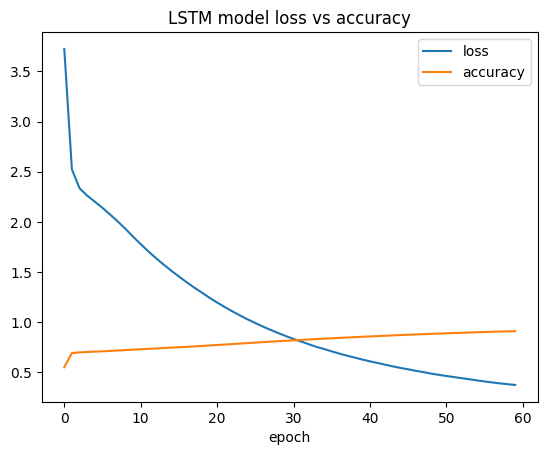

In [ ]:
plt.plot(result_lstm_TE.history['loss'])
plt.plot(result_lstm_TE.history['accuracy'])
plt.title('LSTM model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
result_lstm_TE.history

{'loss': [3.724097490310669,
  2.5229427814483643,
  2.335170269012451,
  2.2616991996765137,
  2.201404333114624,
  2.1392524242401123,
  2.0731747150421143,
  2.004248857498169,
  1.9306597709655762,
  1.8531177043914795,
  1.7780908346176147,
  1.7061924934387207,
  1.6385403871536255,
  1.5743417739868164,
  1.5135912895202637,
  1.4555827379226685,
  1.3991280794143677,
  1.345514178276062,
  1.2952208518981934,
  1.243873119354248,
  1.1962748765945435,
  1.1509474515914917,
  1.1076909303665161,
  1.0669631958007812,
  1.0278276205062866,
  0.9912357330322266,
  0.9561519622802734,
  0.9228278994560242,
  0.8916398882865906,
  0.861457109451294,
  0.8329487442970276,
  0.8071761131286621,
  0.7800449728965759,
  0.7538697719573975,
  0.7326304912567139,
  0.709250271320343,
  0.6867573857307434,
  0.6664354205131531,
  0.6471869349479675,
  0.6276054978370667,
  0.6097784042358398,
  0.5934424996376038,
  0.5761794447898865,
  0.559361457824707,
  0.5438557863235474,
  0.5304390

In [ ]:
model_TE_Bilstm = Sequential()
model_TE_Bilstm.add(Embedding(telugu_vocabulary, 256, input_length=max_telugu_len, mask_zero=True))
model_TE_Bilstm.add(Bidirectional(LSTM(256)))
model_TE_Bilstm.add(RepeatVector(max_english_len))
model_TE_Bilstm.add(Bidirectional(LSTM(256,return_sequences=True)))
model_TE_Bilstm.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_TE_Bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_TE_Bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 256)           15497472  
                                                                 
 bidirectional_2 (Bidirecti  (None, 512)               1050624   
 onal)                                                           
                                                                 
 repeat_vector_1 (RepeatVec  (None, 25, 512)           0         
 tor)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 25, 512)           1574912   
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 25, 34883)         17894979  
                                                      

In [ ]:
result_bilstm_TE=model_TE_Bilstm.fit(xtrainTE,ytrainTE,epochs=30,batch_size=128)

Epoch 1/30
552/552 [==============================] - 131s 214ms/step - loss: 2.6914 - accuracy: 0.6923
Epoch 2/30
552/552 [==============================] - 106s 192ms/step - loss: 2.3379 - accuracy: 0.7001
Epoch 3/30
552/552 [==============================] - 105s 190ms/step - loss: 2.2030 - accuracy: 0.7062
Epoch 4/30
552/552 [==============================] - 104s 188ms/step - loss: 2.0931 - accuracy: 0.7117
Epoch 5/30
552/552 [==============================] - 104s 188ms/step - loss: 1.9697 - accuracy: 0.7187
Epoch 6/30
552/552 [==============================] - 104s 188ms/step - loss: 1.8507 - accuracy: 0.7244
Epoch 7/30
552/552 [==============================] - 104s 188ms/step - loss: 1.7353 - accuracy: 0.7297
Epoch 8/30
552/552 [==============================] - 104s 188ms/step - loss: 1.6206 - accuracy: 0.7351
Epoch 9/30
552/552 [==============================] - 104s 188ms/step - loss: 1.5113 - accuracy: 0.7406
Epoch 10/30
552/552 [==============================] - 104s 188m

In [ ]:
model_TE_Bilstm.evaluate(xtestTE,ytestTE)

945/945 [==============================] - 47s 45ms/step - loss: 2.2755 - accuracy: 0.7292


[2.275548219680786, 0.7292299270629883]

In [ ]:
model_TE_Bilstm.save('model_TE_Bilstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


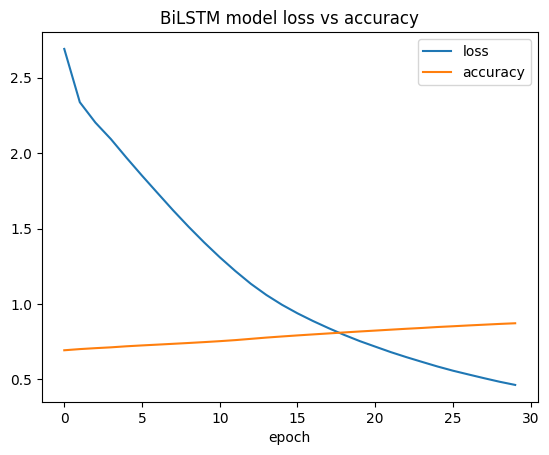

In [ ]:
plt.plot(result_bilstm_TE.history['loss'])
plt.plot(result_bilstm_TE.history['accuracy'])
plt.title('BiLSTM model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
model_TE_GRU = Sequential()
model_TE_GRU.add(Embedding(telugu_vocabulary, 256, input_length=max_telugu_len, mask_zero=True))
model_TE_GRU.add(GRU(256))
model_TE_GRU.add(RepeatVector(max_english_len))
model_TE_GRU.add(GRU(256,return_sequences=True))
model_TE_GRU.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_TE_GRU.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_TE_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 256)           15497472  
                                                                 
 gru_2 (GRU)                 (None, 256)               394752    
                                                                 
 repeat_vector_3 (RepeatVec  (None, 25, 256)           0         
 tor)                                                            
                                                                 
 gru_3 (GRU)                 (None, 25, 256)           394752    
                                                                 
 dense_3 (Dense)             (None, 25, 34883)         8964931   
                                                                 
Total params: 25251907 (96.33 MB)
Trainable params: 25251907 (96.33 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
result_gru_TE=model_TE_GRU.fit(xtrainTE,ytrainTE,epochs=25,batch_size=128)

Epoch 1/25
552/552 [==============================] - 90s 150ms/step - loss: 2.7533 - accuracy: 0.6890
Epoch 2/25
552/552 [==============================] - 69s 126ms/step - loss: 2.3574 - accuracy: 0.6982
Epoch 3/25
552/552 [==============================] - 70s 127ms/step - loss: 2.2786 - accuracy: 0.7022
Epoch 4/25
552/552 [==============================] - 69s 126ms/step - loss: 2.2080 - accuracy: 0.7051
Epoch 5/25
552/552 [==============================] - 70s 127ms/step - loss: 2.1334 - accuracy: 0.7086
Epoch 6/25
552/552 [==============================] - 70s 126ms/step - loss: 2.0476 - accuracy: 0.7132
Epoch 7/25
552/552 [==============================] - 70s 126ms/step - loss: 1.9470 - accuracy: 0.7188
Epoch 8/25
552/552 [==============================] - 70s 127ms/step - loss: 1.8571 - accuracy: 0.7232
Epoch 9/25
552/552 [==============================] - 69s 126ms/step - loss: 1.7673 - accuracy: 0.7278
Epoch 10/25
552/552 [==============================] - 70s 126ms/step - l

In [ ]:
model_TE_GRU.evaluate(xtestTE,ytestTE)

945/945 [==============================] - 39s 39ms/step - loss: 2.0310 - accuracy: 0.7239


[2.031033754348755, 0.7238819599151611]

In [ ]:
model_TE_GRU.save('model_TE_GRU.h5')

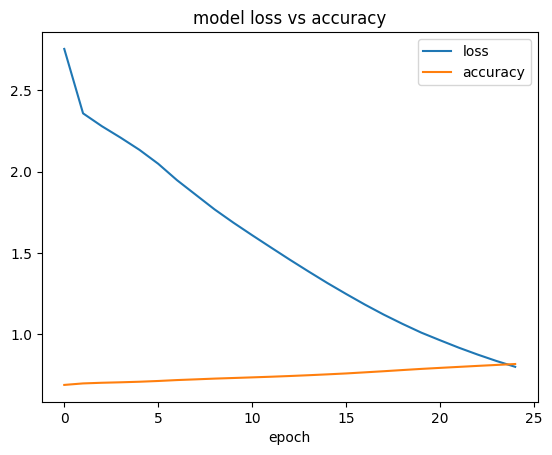

In [ ]:
plt.plot(result_gru_TE.history['loss'])
plt.plot(result_gru_TE.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

### 2) KANNADA - ENGLISH

In [ ]:
xtrainKN,xtestKN,ytrainKN,ytestKN=train_test_split(kannada_pad,english_pad,test_size=0.30)

In [ ]:
xtrainKN.shape,xtestKN.shape,ytrainKN.shape,ytestKN.shape

((70541, 24), (30232, 24), (70541, 25), (30232, 25))

In [ ]:
model_KN_lstm = Sequential()
model_KN_lstm.add(Embedding(kannada_vocabulary, 256, input_length=max_kannada_len, mask_zero=True))
model_KN_lstm.add(LSTM(256))
model_KN_lstm.add(RepeatVector(max_english_len))
model_KN_lstm.add(LSTM(256,return_sequences=True))
model_KN_lstm.add(TimeDistributed(Dense(english_vocabulary, activation='sigmoid')))

In [ ]:
model_KN_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_KN_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 256)           18548992  
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 25, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 25, 34883)         8964931   
 ributed)                                                        
                                                                 
Total params: 28564547 (108.97 MB)
Trainable params: 285

In [ ]:
result_lstm_KN=model_KN_lstm.fit(xtrainKN,ytrainKN,epochs=30,batch_size=128)

Epoch 1/30
552/552 [==============================] - 92s 166ms/step - loss: 0.8271 - accuracy: 0.8284
Epoch 2/30
552/552 [==============================] - 93s 169ms/step - loss: 0.8004 - accuracy: 0.8329
Epoch 3/30
552/552 [==============================] - 93s 169ms/step - loss: 0.7748 - accuracy: 0.8373
Epoch 4/30
552/552 [==============================] - 93s 169ms/step - loss: 0.7512 - accuracy: 0.8411
Epoch 5/30
552/552 [==============================] - 93s 169ms/step - loss: 0.7297 - accuracy: 0.8450
Epoch 6/30
552/552 [==============================] - 93s 168ms/step - loss: 0.7071 - accuracy: 0.8490
Epoch 7/30
552/552 [==============================] - 93s 169ms/step - loss: 0.6863 - accuracy: 0.8526
Epoch 8/30
552/552 [==============================] - 93s 169ms/step - loss: 0.6657 - accuracy: 0.8567
Epoch 9/30
552/552 [==============================] - 93s 168ms/step - loss: 0.6472 - accuracy: 0.8602
Epoch 10/30
552/552 [==============================] - 93s 169ms/step - l

In [ ]:
model_KN_lstm.evaluate(xtestKN,ytestKN)

945/945 [==============================] - 40s 42ms/step - loss: 2.4529 - accuracy: 0.7171


[2.452934741973877, 0.7171474099159241]

In [ ]:
model_KN_lstm.save('model_KN_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


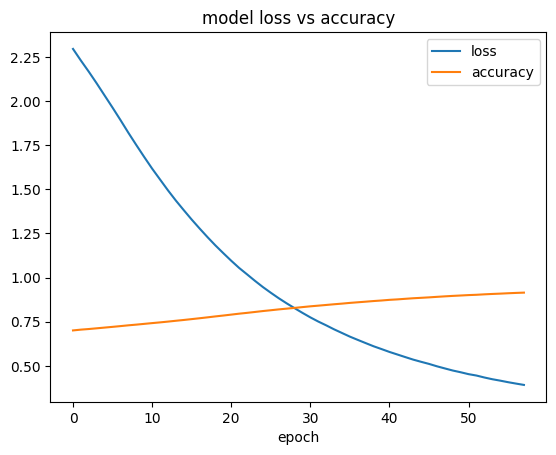

In [ ]:
plt.plot(result_lstm_KN.history['loss'])
plt.plot(result_lstm_KN.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
result_lstm_KN.history

{'loss': [0.8270758986473083,
  0.8003523945808411,
  0.7747565507888794,
  0.7511762380599976,
  0.7297019362449646,
  0.7070541381835938,
  0.686346709728241,
  0.6656815409660339,
  0.6471641063690186,
  0.6289904713630676,
  0.611060619354248,
  0.5952388048171997,
  0.5790454149246216,
  0.5645079612731934,
  0.5498931407928467,
  0.53555828332901,
  0.5231286287307739,
  0.5112531781196594,
  0.49772727489471436,
  0.48563849925994873,
  0.47382140159606934,
  0.46399879455566406,
  0.4532270133495331,
  0.4453420042991638,
  0.43427491188049316,
  0.4245228171348572,
  0.4164680242538452,
  0.4077014923095703,
  0.3997918963432312,
  0.39223793148994446],
 'accuracy': [0.8283812403678894,
  0.8329192996025085,
  0.8373003005981445,
  0.8410762548446655,
  0.8450064659118652,
  0.8489978909492493,
  0.8526201844215393,
  0.8567408919334412,
  0.8602027297019958,
  0.8636327981948853,
  0.8672431707382202,
  0.8703035116195679,
  0.8739932775497437,
  0.8765915036201477,
  0.87988

In [ ]:
model_KN_Bilstm = Sequential()
model_KN_Bilstm.add(Embedding(kannada_vocabulary, 256, input_length=max_kannada_len, mask_zero=True))
model_KN_Bilstm.add(Bidirectional(LSTM(256)))
model_KN_Bilstm.add(RepeatVector(max_english_len))
model_KN_Bilstm.add(Bidirectional(LSTM(256,return_sequences=True)))
model_KN_Bilstm.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_KN_Bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_KN_Bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 256)           18548992  
                                                                 
 bidirectional (Bidirection  (None, 512)               1050624   
 al)                                                             
                                                                 
 repeat_vector_1 (RepeatVec  (None, 25, 512)           0         
 tor)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 25, 512)           1574912   
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 25, 34883)         17894979  
                                                      

In [ ]:
result_bilstm_KN=model_KN_Bilstm.fit(xtrainKN,ytrainKN,epochs=30,batch_size=128)

Epoch 1/30
552/552 [==============================] - 125s 195ms/step - loss: 2.7031 - accuracy: 0.6920
Epoch 2/30
552/552 [==============================] - 99s 179ms/step - loss: 2.3393 - accuracy: 0.7001
Epoch 3/30
552/552 [==============================] - 101s 183ms/step - loss: 2.1917 - accuracy: 0.7069
Epoch 4/30
552/552 [==============================] - 101s 183ms/step - loss: 2.0763 - accuracy: 0.7127
Epoch 5/30
552/552 [==============================] - 101s 184ms/step - loss: 1.9418 - accuracy: 0.7202
Epoch 6/30
552/552 [==============================] - 102s 185ms/step - loss: 1.8085 - accuracy: 0.7265
Epoch 7/30
552/552 [==============================] - 102s 184ms/step - loss: 1.6848 - accuracy: 0.7326
Epoch 8/30
552/552 [==============================] - 103s 186ms/step - loss: 1.5666 - accuracy: 0.7387
Epoch 9/30
552/552 [==============================] - 102s 185ms/step - loss: 1.4539 - accuracy: 0.7447
Epoch 10/30
552/552 [==============================] - 102s 184ms

In [ ]:
model_KN_Bilstm.evaluate(xtestKN,ytestKN)

945/945 [==============================] - 43s 41ms/step - loss: 2.3974 - accuracy: 0.7278


[2.3973848819732666, 0.7278446555137634]

In [ ]:
model_KN_Bilstm.save('model_KN_Bilstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


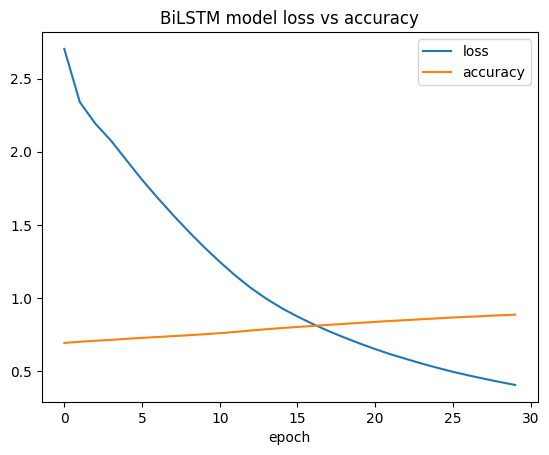

In [ ]:
plt.plot(result_bilstm_KN.history['loss'])
plt.plot(result_bilstm_KN.history['accuracy'])
plt.title('BiLSTM model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
model_KN_GRU = Sequential()
model_KN_GRU.add(Embedding(kannada_vocabulary, 256, input_length=max_kannada_len, mask_zero=True))
model_KN_GRU.add(GRU(256))
model_KN_GRU.add(RepeatVector(max_english_len))
model_KN_GRU.add(GRU(256,return_sequences=True))
model_KN_GRU.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_KN_GRU.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_KN_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 24, 256)           18548992  
                                                                 
 gru (GRU)                   (None, 256)               394752    
                                                                 
 repeat_vector_2 (RepeatVec  (None, 25, 256)           0         
 tor)                                                            
                                                                 
 gru_1 (GRU)                 (None, 25, 256)           394752    
                                                                 
 dense_2 (Dense)             (None, 25, 34883)         8964931   
                                                                 
Total params: 28303427 (107.97 MB)
Trainable params: 28303427 (107.97 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [ ]:
result_gru_KN=model_KN_GRU.fit(xtrainKN,ytrainKN,epochs=25,batch_size=128)

Epoch 1/25
552/552 [==============================] - 83s 140ms/step - loss: 2.7469 - accuracy: 0.6892
Epoch 2/25
552/552 [==============================] - 67s 122ms/step - loss: 2.3461 - accuracy: 0.6985
Epoch 3/25
552/552 [==============================] - 67s 122ms/step - loss: 2.2435 - accuracy: 0.7036
Epoch 4/25
552/552 [==============================] - 68s 123ms/step - loss: 2.1643 - accuracy: 0.7079
Epoch 5/25
552/552 [==============================] - 68s 123ms/step - loss: 2.0827 - accuracy: 0.7127
Epoch 6/25
552/552 [==============================] - 68s 123ms/step - loss: 1.9954 - accuracy: 0.7171
Epoch 7/25
552/552 [==============================] - 68s 124ms/step - loss: 1.9094 - accuracy: 0.7215
Epoch 8/25
552/552 [==============================] - 68s 123ms/step - loss: 1.8259 - accuracy: 0.7265
Epoch 9/25
552/552 [==============================] - 68s 123ms/step - loss: 1.7431 - accuracy: 0.7309
Epoch 10/25
552/552 [==============================] - 68s 123ms/step - l

In [ ]:
model_KN_GRU.evaluate(xtestKN,ytestKN)

945/945 [==============================] - 35s 36ms/step - loss: 2.1277 - accuracy: 0.7255


[2.127742052078247, 0.7254961729049683]

In [ ]:
model_KN_GRU.save('model_KN_GRU.h5')

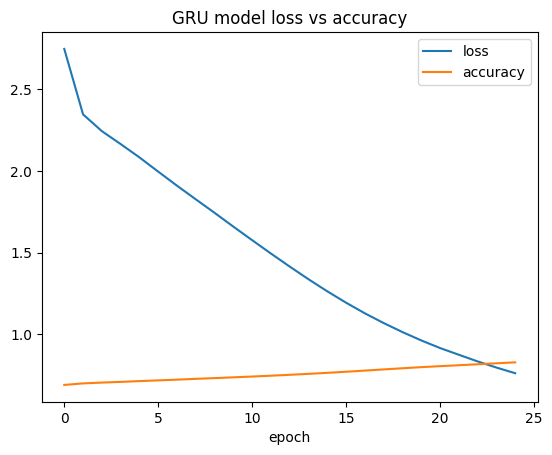

In [ ]:
plt.plot(result_gru_KN.history['loss'])
plt.plot(result_gru_KN.history['accuracy'])
plt.title('GRU model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

### 3) MALAYALAM - ENGLISH

In [ ]:
xtrainML,xtestML,ytrainML,ytestML=train_test_split(malayalam_pad,english_pad,test_size=0.30)

In [ ]:
xtrainML.shape,xtestML.shape,ytrainML.shape,ytestML.shape

((70541, 24), (30232, 24), (70541, 25), (30232, 25))

In [ ]:
model_ML_lstm = Sequential()
model_ML_lstm.add(Embedding(malayalam_vocabulary, 256, input_length=max_malayalam_len, mask_zero=True))
model_ML_lstm.add(LSTM(256))
model_ML_lstm.add(RepeatVector(max_english_len))
model_ML_lstm.add(LSTM(256,return_sequences=True))
model_ML_lstm.add(TimeDistributed(Dense(english_vocabulary, activation='sigmoid')))

In [ ]:
model_ML_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_ML_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 256)           22682112  
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 25, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 25, 34883)         8964931   
 ributed)                                                        
                                                                 
Total params: 32697667 (124.73 MB)
Trainable params: 326

In [ ]:
result_lstm_ML=model_ML_lstm.fit(xtrainML,ytrainML,epochs=60,batch_size=128)

Epoch 1/60
552/552 [==============================] - 122s 187ms/step - loss: 3.7568 - accuracy: 0.5274
Epoch 2/60
552/552 [==============================] - 94s 170ms/step - loss: 2.7383 - accuracy: 0.6869
Epoch 3/60
552/552 [==============================] - 93s 168ms/step - loss: 2.4024 - accuracy: 0.6965
Epoch 4/60
552/552 [==============================] - 93s 168ms/step - loss: 2.3385 - accuracy: 0.6995
Epoch 5/60
552/552 [==============================] - 93s 168ms/step - loss: 2.2677 - accuracy: 0.7036
Epoch 6/60
552/552 [==============================] - 92s 167ms/step - loss: 2.2038 - accuracy: 0.7063
Epoch 7/60
552/552 [==============================] - 92s 167ms/step - loss: 2.1443 - accuracy: 0.7097
Epoch 8/60
552/552 [==============================] - 92s 167ms/step - loss: 2.0853 - accuracy: 0.7130
Epoch 9/60
552/552 [==============================] - 92s 167ms/step - loss: 2.0264 - accuracy: 0.7164
Epoch 10/60
552/552 [==============================] - 92s 166ms/step - 

In [ ]:
model_ML_lstm.evaluate(xtestML,ytestML)

945/945 [==============================] - 40s 40ms/step - loss: 2.5016 - accuracy: 0.7128


[2.5015735626220703, 0.7127904295921326]

In [ ]:
model_ML_lstm.save('model_ML_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


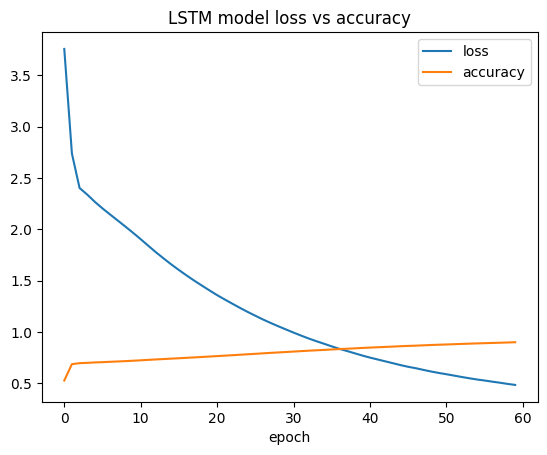

In [ ]:
plt.plot(result_lstm_ML.history['loss'])
plt.plot(result_lstm_ML.history['accuracy'])
plt.title('LSTM model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
model_ML_Bilstm = Sequential()
model_ML_Bilstm.add(Embedding(malayalam_vocabulary, 256, input_length=max_malayalam_len, mask_zero=True))
model_ML_Bilstm.add(Bidirectional(LSTM(256)))
model_ML_Bilstm.add(RepeatVector(max_english_len))
model_ML_Bilstm.add(Bidirectional(LSTM(256,return_sequences=True)))
model_ML_Bilstm.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_ML_Bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_ML_Bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 24, 256)           22682112  
                                                                 
 bidirectional_2 (Bidirecti  (None, 512)               1050624   
 onal)                                                           
                                                                 
 repeat_vector_2 (RepeatVec  (None, 25, 512)           0         
 tor)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 25, 512)           1574912   
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 25, 34883)         17894979  
                                                      

In [ ]:
result_bilstm_ML=model_ML_Bilstm.fit(xtrainML,ytrainML,epochs=5,batch_size=128)

Epoch 1/5
552/552 [==============================] - 104s 188ms/step - loss: 0.5049 - accuracy: 0.8644
Epoch 2/5
552/552 [==============================] - 103s 187ms/step - loss: 0.4781 - accuracy: 0.8696
Epoch 3/5
552/552 [==============================] - 103s 186ms/step - loss: 0.4532 - accuracy: 0.8753
Epoch 4/5
552/552 [==============================] - 102s 186ms/step - loss: 0.4317 - accuracy: 0.8798
Epoch 5/5
552/552 [==============================] - 103s 186ms/step - loss: 0.4106 - accuracy: 0.8845


In [ ]:
model_ML_Bilstm.evaluate(xtestML,ytestML)

945/945 [==============================] - 40s 43ms/step - loss: 2.5389 - accuracy: 0.7183


[2.5388784408569336, 0.7183130383491516]

In [ ]:
model_ML_Bilstm.save('model_ML_Bilstm.h5')

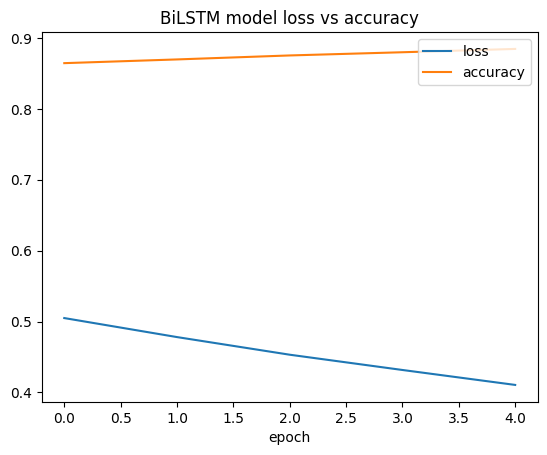

In [ ]:
plt.plot(result_bilstm_ML.history['loss'])
plt.plot(result_bilstm_ML.history['accuracy'])
plt.title('BiLSTM model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
result_bilstm_ML.history

{'loss': [0.5049134492874146,
  0.47809213399887085,
  0.45322608947753906,
  0.43169400095939636,
  0.4106255769729614],
 'accuracy': [0.8643983006477356,
  0.86963951587677,
  0.875259518623352,
  0.879777729511261,
  0.8844620585441589]}

In [ ]:
model_ML_GRU = Sequential()
model_ML_GRU.add(Embedding(malayalam_vocabulary, 256, input_length=max_malayalam_len, mask_zero=True))
model_ML_GRU.add(GRU(256))
model_ML_GRU.add(RepeatVector(max_english_len))
model_ML_GRU.add(GRU(256,return_sequences=True))
model_ML_GRU.add(Dense(english_vocabulary, activation='sigmoid'))

In [ ]:
model_ML_GRU.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_ML_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 24, 256)           22682112  
                                                                 
 gru (GRU)                   (None, 256)               394752    
                                                                 
 repeat_vector_3 (RepeatVec  (None, 25, 256)           0         
 tor)                                                            
                                                                 
 gru_1 (GRU)                 (None, 25, 256)           394752    
                                                                 
 dense_3 (Dense)             (None, 25, 34883)         8964931   
                                                                 
Total params: 32436547 (123.74 MB)
Trainable params: 32436547 (123.74 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [ ]:
result_gru_ML=model_ML_GRU.fit(xtrainML,ytrainML,epochs=25,batch_size=128)

Epoch 1/25
552/552 [==============================] - 87s 146ms/step - loss: 2.7633 - accuracy: 0.6885
Epoch 2/25
552/552 [==============================] - 69s 125ms/step - loss: 2.3472 - accuracy: 0.6985
Epoch 3/25
552/552 [==============================] - 68s 124ms/step - loss: 2.2367 - accuracy: 0.7039
Epoch 4/25
552/552 [==============================] - 68s 123ms/step - loss: 2.1520 - accuracy: 0.7074
Epoch 5/25
552/552 [==============================] - 68s 123ms/step - loss: 2.0812 - accuracy: 0.7114
Epoch 6/25
552/552 [==============================] - 68s 123ms/step - loss: 1.9966 - accuracy: 0.7163
Epoch 7/25
552/552 [==============================] - 68s 123ms/step - loss: 1.9095 - accuracy: 0.7210
Epoch 8/25
552/552 [==============================] - 68s 123ms/step - loss: 1.8314 - accuracy: 0.7252
Epoch 9/25
552/552 [==============================] - 68s 123ms/step - loss: 1.7555 - accuracy: 0.7298
Epoch 10/25
552/552 [==============================] - 68s 123ms/step - l

In [ ]:
model_ML_GRU.evaluate(xtestML,ytestML)

945/945 [==============================] - 37s 37ms/step - loss: 2.2349 - accuracy: 0.7193


[2.2349300384521484, 0.7192670106887817]

In [ ]:
model_ML_GRU.save('model_ML_GRU.h5')

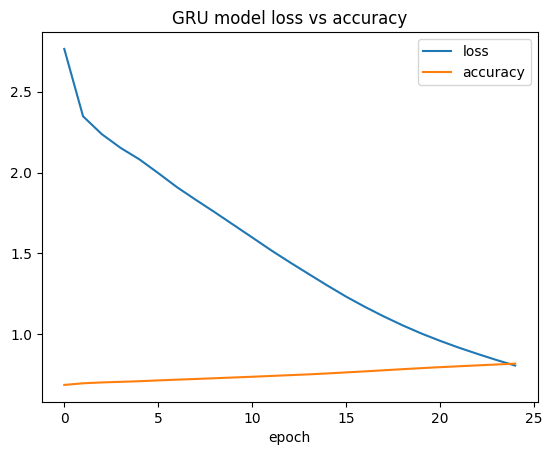

In [ ]:
plt.plot(result_gru_ML.history['loss'])
plt.plot(result_gru_ML.history['accuracy'])
plt.title('GRU model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [35]:
model_TE_lstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_TE_lstm.h5")
model_TE_Bilstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_TE_Bilstm.h5")
model_TE_GRU=load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_TE_GRU.h5")

In [36]:
def translateTE(s):
  s=cleaning_text(s)
  print("Reference sentence : ",s)
  arr=[telugu_tokens.word_index[i] for i in s.split()]
  arr=np.array(arr).reshape(1,-1)
  arr=pad_sequences(arr,maxlen=max_telugu_len,padding="post")
  eng_te_lstm = model_TE_lstm.predict(arr)[0]
  eng_te_Bilstm = model_TE_Bilstm.predict(arr)[0]
  eng_te_GRU = model_TE_GRU.predict(arr)[0]

  eng_lstm_TE = ""
  for i in np.argmax(eng_te_lstm,1):
    if i!=0:
      eng_lstm_TE += english_tokens.index_word[i]+" "
  eng_lstm_TE = eng_lstm_TE.strip()
  print("LSTM : ",eng_lstm_TE)

  eng_Bilstm_TE = ""
  for i in np.argmax(eng_te_Bilstm,1):
    if i!=0:
      eng_Bilstm_TE += english_tokens.index_word[i]+" "
  eng_Bilstm_TE = eng_Bilstm_TE.strip()
  print("BiLSTM : ",eng_Bilstm_TE)

  eng_GRU_TE = ""
  for i in np.argmax(eng_te_GRU,1):
    if i!=0:
      eng_GRU_TE += english_tokens.index_word[i]+" "
  eng_GRU_TE = eng_GRU_TE.strip()
  print("GRU : ",eng_GRU_TE,"\n")
  
  return (eng_lstm_TE,eng_Bilstm_TE,eng_GRU_TE)

translateTE('మేము బీచ్ కి వెళ్ళాము')

Reference sentence :  మేము బీచ్ కి వెళ్ళాము
1/1 [==============================] - 5s 5s/step
LSTM :  we went to the beach
BiLSTM :  we went to the beach
GRU :  we went to the beach 



('we went to the beach', 'we went to the beach', 'we went to the beach')

In [37]:
model_KN_lstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_KN_lstm.h5")
model_KN_Bilstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_KN_Bilstm.h5")
model_KN_GRU=load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_KN_GRU.h5")

In [47]:
def translateKN(s):
  s=cleaning_text(s)
  print("Reference sentence : ",s)
  arr=[kannada_tokens.word_index[i] for i in s.split()]
  arr=np.array(arr).reshape(1,-1)
  arr=pad_sequences(arr, maxlen=max_kannada_len, padding="post")
  eng_kn_lstm = model_KN_lstm.predict(arr)[0]
  eng_kn_Bilstm = model_KN_Bilstm.predict(arr)[0]
  eng_kn_GRU = model_KN_GRU.predict(arr)[0]

  eng_lstm_KN = ""
  for i in np.argmax(eng_kn_lstm,1):
    if i!=0:
      eng_lstm_KN += english_tokens.index_word[i]+" "
  eng_lstm_KN = eng_lstm_KN.strip()
  print("LSTM : ",eng_lstm_KN)

  eng_Bilstm_KN = ""
  for i in np.argmax(eng_kn_Bilstm,1):
    if i!=0:
      eng_Bilstm_KN += english_tokens.index_word[i]+" "
  eng_Bilstm_KN = eng_Bilstm_KN.strip()
  print("BiLSTM : ",eng_Bilstm_KN)

  eng_GRU_KN = ""
  for i in np.argmax(eng_kn_GRU,1):
    if i!=0:
      eng_GRU_KN += english_tokens.index_word[i]+" "
  eng_GRU_KN = eng_GRU_KN.strip()
  print("GRU : ",eng_GRU_KN,"\n")
  
  return (eng_lstm_KN,eng_Bilstm_KN,eng_GRU_KN)
  

translateKN('ನೀವು ಎಲ್ಲಿಂದ ಬಂದಿದ್ದೀರಿ')

Reference sentence :  ನೀವು ಎಲ್ಲಿಂದ ಬಂದಿದ್ದೀರಿ
1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 96ms/step
LSTM :  where did you come from
BiLSTM :  where did you come
GRU :  where where you come from 



('where did you come from', 'where did you come', 'where where you come from')

In [39]:
model_ML_lstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_ML_lstm.h5")
model_ML_Bilstm = load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_ML_Bilstm.h5")
model_ML_GRU=load_model(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\DL models\model_ML_GRU.h5")

In [43]:
def translateML(s):
  s=cleaning_text(s)
  print("Reference sentence : ",s)
  arr=[malayalam_tokens.word_index[i] for i in s.split()]
  arr=np.array(arr).reshape(1,-1)
  arr=pad_sequences(arr, maxlen=max_malayalam_len, padding="post")
  eng_ml_lstm = model_ML_lstm.predict(arr)[0]
  eng_ml_Bilstm = model_ML_Bilstm.predict(arr)[0]
  eng_ml_GRU = model_ML_GRU.predict(arr)[0]

  eng_lstm_ML = ""
  for i in np.argmax(eng_ml_lstm,1):
    if i!=0:
      eng_lstm_ML += english_tokens.index_word[i]+" "
  eng_lstm_ML = eng_lstm_ML.strip()
  print("LSTM : ",eng_lstm_ML)

  eng_Bilstm_ML = ""
  for i in np.argmax(eng_ml_Bilstm,1):
    if i!=0:
      eng_Bilstm_ML += english_tokens.index_word[i]+" "
  eng_Bilstm_ML = eng_Bilstm_ML.strip()
  print("BiLSTM : ",eng_Bilstm_ML)

  eng_GRU_ML = ""
  for i in np.argmax(eng_ml_GRU,1):
    if i!=0:
      eng_GRU_ML += english_tokens.index_word[i]+" "
  eng_GRU_ML = eng_GRU_ML.strip()
  print("GRU : ",eng_GRU_ML,"\n")
  
  return (eng_lstm_ML,eng_Bilstm_ML,eng_GRU_ML)

translateML('ഞാൻ ഇന്ന് ഒരു പുതിയ ഭാഷ പഠിച്ചു')

Reference sentence :  ഞാൻ ഇന്ന് ഒരു പുതിയ ഭാഷ പഠിച്ചു
1/1 [==============================] - 0s 293ms/step


1/1 [==============================] - 0s 330ms/step
LSTM :  i learned a new new new
BiLSTM :  i m new new new new
GRU :  i learned a a language 



('i learned a new new new', 'i m new new new new', 'i learned a a language')

# *BLEU SCORE EVALUATION*

* TELUGU-ENGLISH TRANSLATION

In [48]:
te_en_test = pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\TE_EN test.xlsx")
te_en_test

TELUGU  \
0     ఒక సమయంలో తమ్ముడు దేశం 312 మరియు అతని రాధా ఇల్...   
1                                            74 కోట్లు    
2     సౌరవ్ గంగూలీ భారతీయ క్రికెట్‌లో అతిపెద్ద సహాయప...   
3                                బాగా మీరు వస్తున్నారా    
4                   భారతదేశంలో లక్షల దేవాలయాలు ఉన్నాయి    
...                                                 ...   
1995  బావులలో పనిచేస్తున్న ఆర్థిక శాఖకు చెందిన 35 మం...   
1996  వాస్తవానికి ఉద్యోగాల మరియు పరికర తరువాత భారతదే...   
1997  తరువాత 390 నుండి అధిక కణాలను కారణంగా జీవితం అధ...   
1998  మరియు యమహా బయటకు వెళ్ళింది పుట్టినరోజున ఆమె ఇక...   
1999  క్యాన్సర్ సరఫరా కోసం ఆర్‌పిఎమ్ సేకరించడానికి ఆ...   

                                                ENGLISH  
0     at one time abrahams country was ur and his fa...  
1                                             74 crore   
2     sourav ganguly is one of the biggest names in ...  
3                                  well are you coming   
4                  there are lakhs of temples in india   
...                                                 ...  
1995  only 35 employees of finance department workin...  
1996  in fact india was the third most economically ...  
1997  after life will be destroyed because of excess...  
1998  and went out screaming thus she can no longer ...  
1999  she organized a charity run to raise funds for...  

[2000 rows x 2 columns]

In [49]:
te_en_test["ENGLISH"]=te_en_test["ENGLISH"].apply(cleaning_text)
te_en_test

TELUGU  \
0     ఒక సమయంలో తమ్ముడు దేశం 312 మరియు అతని రాధా ఇల్...   
1                                            74 కోట్లు    
2     సౌరవ్ గంగూలీ భారతీయ క్రికెట్‌లో అతిపెద్ద సహాయప...   
3                                బాగా మీరు వస్తున్నారా    
4                   భారతదేశంలో లక్షల దేవాలయాలు ఉన్నాయి    
...                                                 ...   
1995  బావులలో పనిచేస్తున్న ఆర్థిక శాఖకు చెందిన 35 మం...   
1996  వాస్తవానికి ఉద్యోగాల మరియు పరికర తరువాత భారతదే...   
1997  తరువాత 390 నుండి అధిక కణాలను కారణంగా జీవితం అధ...   
1998  మరియు యమహా బయటకు వెళ్ళింది పుట్టినరోజున ఆమె ఇక...   
1999  క్యాన్సర్ సరఫరా కోసం ఆర్‌పిఎమ్ సేకరించడానికి ఆ...   

                                                ENGLISH  
0     at one time abrahams country was ur and his fa...  
1                                              74 crore  
2     sourav ganguly is one of the biggest names in ...  
3                                   well are you coming  
4                   there are lakhs of temples in india  
...                                                 ...  
1995  only 35 employees of finance department workin...  
1996  in fact india was the third most economically ...  
1997  after life will be destroyed because of excess...  
1998  and went out screaming thus she can no longer ...  
1999  she organized a charity run to raise funds for...  

[2000 rows x 2 columns]

In [50]:
actual_TE_EN = []
for i in list(te_en_test["ENGLISH"]):
    actual_TE_EN.append([i])
from_TE_EN = list(te_en_test["TELUGU"])

In [51]:
actual_TE_EN

[['at one time abrahams country was ur and his fathers house was there'],
 ['74 crore'],
 ['sourav ganguly is one of the biggest names in indian cricket'],
 ['well are you coming'],
 ['there are lakhs of temples in india'],
 ['she is the daughter of chunky pandey and bhavna pandey'],
 ['i don t pay attention to that'],
 ['we need to leave right now'],
 ['not the song but the movie'],
 ['then and appeared tens of thousands of jews came for the annual festivals'],
 ['he said students should also take part in sports and cultural activities'],
 ['chief minister k chandrasekhar rao expressed sorrow over reddys death'],
 ['three injured people were taken to a hospital'],
 ['he also teachings on the governments renowned to resigned immunization to all children'],
 ['toss should be on time'],
 ['china calls the dalai lama the spiritual leader of the tibetans a splittist and a dangerous separatist'],
 ['one man was injured in mishap who was taken to hospital'],
 ['the sites include government a

In [52]:
predicted_TE_EN_LSTM=[]
predicted_TE_EN_BiLSTM=[]
predicted_TE_EN_GRU=[]

for i in from_TE_EN:
    try:
        to_TE_EN=translateTE(i) 
        predicted_TE_EN_LSTM.append(to_TE_EN[0])
        predicted_TE_EN_BiLSTM.append(to_TE_EN[1])
        predicted_TE_EN_GRU.append(to_TE_EN[2])
    except:
        predicted_TE_EN_LSTM.append("")
        predicted_TE_EN_BiLSTM.append("")
        predicted_TE_EN_GRU.append("")

Reference sentence :  ఒక సమయంలో తమ్ముడు దేశం 312 మరియు అతని రాధా ఇల్లు అక్కడ ఉంది


1/1 [==============================] - 1s 696ms/step
LSTM :  at one time abrahams was ur ur his house was was his there
BiLSTM :  one whole whole and israel country israel israel israel israel israel israel israel house
GRU :  in the house the house house house house house and and and was is house 

Reference sentence :  74 కోట్లు
1/1 [==============================] - 0s 113ms/step
LSTM :  joshi crore
BiLSTM :  43 crore
GRU :  9 crore 

Reference sentence :  సౌరవ్ గంగూలీ భారతీయ క్రికెట్‌లో అతిపెద్ద సహాయపడగలరు ఒకటి
1/1 [==============================] - 0s 76ms/step
LSTM :  sourav ganguly is one of the names names in indian cricket
BiLSTM :  indian is is the indian indian indian indian indian indian cricket
GRU :  cricket is one one one the the the the the the the cricket 

Reference sentence :  బాగా మీరు వస్తున్నారా
1/1 [==============================] - 0s 104ms/step
LSTM :  well are you coming
BiLSTM :  are you doing
GRU :  are are are are are 

Reference sentence :  భారతదేశంలో లక్ష

In [53]:
print("BLEU score of TE-EN LSTM : ")
print("1-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_LSTM,weights=(1,0,0,0)))
print("3-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_LSTM,weights=(0,0,1,0)))
print("2-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_LSTM,weights=(0,1,0,0)))
print("4-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_LSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_LSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of TE-EN LSTM : 


1-gram  :  0.7893361133752086
3-gram  :  0.5401021818192029
2-gram  :  0.6182865996446241
4-gram  :  0.4894786128577861
Overall :  0.5993290996228461


In [54]:
print("BLEU score of TE-EN BiLSTM : ")
print("1-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_BiLSTM,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_BiLSTM,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_BiLSTM,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_BiLSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_BiLSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of TE-EN BiLSTM : 
1-gram  :  0.6202129598466345
2-gram  :  0.35949522426944147
3-gram  :  0.25724412197754587
4-gram  :  0.20149664901733433
Overall :  0.32787764913420486


In [55]:
print("BLEU score of TE-EN GRU : ")
print("1-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_GRU,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_GRU,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_GRU,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_GRU,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_TE_EN,predicted_TE_EN_GRU,weights=(0.25,0.25,0.25,0.25)))

BLEU score of TE-EN GRU : 
1-gram  :  0.5951389222978537
2-gram  :  0.33318115206187787
3-gram  :  0.23534464019084647
4-gram  :  0.18184652348860417
Overall :  0.3035128086524451


* KANNADA-ENGLISH TRANSLATION

In [56]:
kn_en_test = pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\KN_EN test.xlsx")
kn_en_test

KANNADA  \
0                    ಟಾಮ್ ಫ್ರೆಂಚ್ ಮಾತನಾಡಬಲ್ಲವನು  ನಾನಲ್ಲ   
1                  ಅವಳು ಯಾರಿಗೂ ಕೆಟ್ಟದ್ದನ್ನು ಮಾಡುವುದಿಲ್ಲ   
2                   ಹಕ್ಕಿ ಬೆಳಿಗ್ಗೆ ಸುಂದರವಾದ ಮಧುರ ಹಾಡಿದೆ   
3     ದೀಪಿಕಾ ಪಡುಕೋಣೆ  ಇಮಾಲಿ  ನಲ್ಲಿ ಕಂಗನಾ ರನೌತ್ ಅವರನ್...   
4     ಜಾತಿ ಮತ್ತು ಧರ್ಮದ ಆಧಾರದ ಮೇಲೆ ಸಮಾಜವನ್ನು ವಿಭಜಿಸಲು...   
...                                                 ...   
1995                               ಸತ್ಯವು ಅದನ್ನು ಮೀರಿದೆ   
1996                            ಕೇಳಲು ಇನ್ನೂ ಸುಂದರವಾಗಿದೆ   
1997              ಟಾಮ್‌ಗೆ ಗೊತ್ತಿಲ್ಲದ ವಿಷಯ ನನಗೆ ತಿಳಿದಿದೆ   
1998  ಅಲ್ಪಾವಧಿಯ ಲಾಭವನ್ನು ಗಳಿಸಿದ ಲಾಭದ ಶೇಕಡಾ 15 ರಷ್ಟು ...   
1999                                         ಬೆಲೆ   299   

                                                ENGLISH  
0           tom is the one who can speak french  not me  
1                 she doesnt do anything bad to anybody  
2       the bird sang a beautiful melody in the morning  
3     has deepika padukone replaced kangana ranaut i...  
4     the bjp is trying to divide the society on the...  
...                                                 ...  
1995                           the truth is beyond that  
1996                               still lovely to hear  
1997                  i know something tom doesn t know  
1998  short term gains are taxed at 15 per cent of t...  
1999                                     priced at  299  

[2000 rows x 2 columns]

In [57]:
kn_en_test["ENGLISH"]=kn_en_test["ENGLISH"].apply(cleaning_text)
kn_en_test

KANNADA  \
0                    ಟಾಮ್ ಫ್ರೆಂಚ್ ಮಾತನಾಡಬಲ್ಲವನು  ನಾನಲ್ಲ   
1                  ಅವಳು ಯಾರಿಗೂ ಕೆಟ್ಟದ್ದನ್ನು ಮಾಡುವುದಿಲ್ಲ   
2                   ಹಕ್ಕಿ ಬೆಳಿಗ್ಗೆ ಸುಂದರವಾದ ಮಧುರ ಹಾಡಿದೆ   
3     ದೀಪಿಕಾ ಪಡುಕೋಣೆ  ಇಮಾಲಿ  ನಲ್ಲಿ ಕಂಗನಾ ರನೌತ್ ಅವರನ್...   
4     ಜಾತಿ ಮತ್ತು ಧರ್ಮದ ಆಧಾರದ ಮೇಲೆ ಸಮಾಜವನ್ನು ವಿಭಜಿಸಲು...   
...                                                 ...   
1995                               ಸತ್ಯವು ಅದನ್ನು ಮೀರಿದೆ   
1996                            ಕೇಳಲು ಇನ್ನೂ ಸುಂದರವಾಗಿದೆ   
1997              ಟಾಮ್‌ಗೆ ಗೊತ್ತಿಲ್ಲದ ವಿಷಯ ನನಗೆ ತಿಳಿದಿದೆ   
1998  ಅಲ್ಪಾವಧಿಯ ಲಾಭವನ್ನು ಗಳಿಸಿದ ಲಾಭದ ಶೇಕಡಾ 15 ರಷ್ಟು ...   
1999                                         ಬೆಲೆ   299   

                                                ENGLISH  
0           tom is the one who can speak french  not me  
1                 she doesnt do anything bad to anybody  
2       the bird sang a beautiful melody in the morning  
3     has deepika padukone replaced kangana ranaut i...  
4     the bjp is trying to divide the society on the...  
...                                                 ...  
1995                           the truth is beyond that  
1996                               still lovely to hear  
1997                  i know something tom doesn t know  
1998  short term gains are taxed at 15 per cent of t...  
1999                                     priced at  299  

[2000 rows x 2 columns]

In [58]:
actual_KN_EN = []
for i in list(kn_en_test["ENGLISH"]):
    actual_KN_EN.append([i])
from_KN_EN = list(kn_en_test["KANNADA"])

In [59]:
actual_KN_EN

[['tom is the one who can speak french  not me'],
 ['she doesnt do anything bad to anybody'],
 ['the bird sang a beautiful melody in the morning'],
 ['has deepika padukone replaced kangana ranaut in  imali'],
 ['the bjp is trying to divide the society on the basis of caste and creed  he alleged'],
 ['thanks for the discussion about that'],
 ['the police had found injury marks on the body and the clothes were found blood-stained'],
 ['girija is currently a writer based in london'],
 ['06 crore'],
 ['the other versions'],
 ['without ambition one starts nothing'],
 ['object to the criminalisation of the right to protest'],
 ['there is no difference between both the parties'],
 ['the live sports game was filled with excitement as the teams battled it out for victory'],
 ['job is gone'],
 ['the modi government is trying to crush the people raising dissenting voice'],
 ['to do this  follow the steps below'],
 ['two others were rescued'],
 ['all have performed'],
 ['arsenio hall'],
 ['sourav 

In [60]:
predicted_KN_EN_LSTM=[]
predicted_KN_EN_BiLSTM=[]
predicted_KN_EN_GRU=[]

for i in from_KN_EN:
    try:
        to_KN_EN=translateKN(i)
        predicted_KN_EN_LSTM.append(to_KN_EN[0])
        predicted_KN_EN_BiLSTM.append(to_KN_EN[1])
        predicted_KN_EN_GRU.append(to_KN_EN[2])
    except:
        predicted_KN_EN_LSTM.append("")
        predicted_KN_EN_BiLSTM.append("")
        predicted_KN_EN_GRU.append("")

Reference sentence :  ಟಾಮ್ ಫ್ರೆಂಚ್ ಮಾತನಾಡಬಲ್ಲವನು  ನಾನಲ್ಲ


1/1 [==============================] - 0s 350ms/step
LSTM :  tom is situation situation is s s
BiLSTM :  tom is french who is speak french
GRU :  tom is french french french s providing 

Reference sentence :  ಅವಳು ಯಾರಿಗೂ ಕೆಟ್ಟದ್ದನ್ನು ಮಾಡುವುದಿಲ್ಲ
1/1 [==============================] - 0s 98ms/step
LSTM :  she love love love
BiLSTM :  she helps with with
GRU :  she loves her her 

Reference sentence :  ಹಕ್ಕಿ ಬೆಳಿಗ್ಗೆ ಸುಂದರವಾದ ಮಧುರ ಹಾಡಿದೆ
1/1 [==============================] - 0s 77ms/step
LSTM :  hence that beautiful beautiful beautiful beautiful a a the relationship
BiLSTM :  the film also also very a a a the the team
GRU :  the relationship is the is are the the in in in 

Reference sentence :  ದೀಪಿಕಾ ಪಡುಕೋಣೆ  ಇಮಾಲಿ  ನಲ್ಲಿ ಕಂಗನಾ ರನೌತ್ ಅವರನ್ನು ಬದಲಾಯಿಸಿದ್ದೀರಾ
1/1 [==============================] - 0s 128ms/step
LSTM :  fir also also in by american to to sit
BiLSTM :  bcci has has filed bcci from from from vajpayee
GRU :  speaking has a has has has of of india india 

Reference sentence 

In [64]:
print("BLEU score of KN-EN LSTM : ")
print("1-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_LSTM,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_LSTM,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_LSTM,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_LSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_LSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of KN-EN LSTM : 
1-gram  :  0.6244956169666546
2-gram  :  0.3609034423048944
3-gram  :  0.25439297918000914
4-gram  :  0.20418248750635526
Overall :  0.3289356976273354


In [65]:
print("BLEU score of KN-EN BiLSTM : ")
print("1-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_BiLSTM,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_BiLSTM,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_BiLSTM,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_BiLSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_BiLSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of KN-EN BiLSTM : 
1-gram  :  0.5987031039667547
2-gram  :  0.36118033107525066
3-gram  :  0.26692068459195123
4-gram  :  0.21808732280225987
Overall :  0.33495546132036785


In [66]:
print("BLEU score of KN-EN GRU : ")
print("1-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_GRU,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_GRU,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_GRU,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_GRU,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_KN_EN,predicted_KN_EN_GRU,weights=(0.25,0.25,0.25,0.25)))

BLEU score of KN-EN GRU : 


1-gram  :  0.5521660391643162
2-gram  :  0.3142075178629771
3-gram  :  0.22309882094734831
4-gram  :  0.1766583921692441
Overall :  0.28756064767729766


* MALAYALAM-ENGLISH TRANSLATION

In [67]:
ml_en_test = pd.read_excel(r"C:\Users\saive\OneDrive\Desktop\NLP BDA Project\ML_EN test.xlsx")
ml_en_test

MALAYALAM  \
0     പ്രധാനമന്ത്രി ടിഎസ്ഐ ഇന്ധനക്ഷമതയും വൈദ്യുതധാരക...   
1                              ഇതൊരു വലിയ എന്നതാണെന്ന്    
2                                  എന്താണ് മരണ നിരക്ക്    
3     ബി ഒരു ഭാര്യ നിർണ്ണായകമാണ് എങ്ങനെ സംഭാവന നൽകുന...   
4                                           അവൻ പറഞ്ഞു    
...                                                 ...   
1995  കേരളം രാജസ്ഥാൻ പഞ്ചാബ് എന്നിവർ ഇതിനകം കത്തിച്ച...   
1996                                  കോപ്പി സർക്കാരും    
1997   ആദ്യ ഇന്നിംഗ്സിൽ ഇന്ത്യ കമാന റൺസ് നേതൃത്വം നൽകി    
1998  ഇന്ത്യ അതിന്റെ ഭാഗമായതിനാൽ കശ്മീർ അതിന്റെ ആന്ത...   
1999                  പിന്നീട് ദമ്പതികൾ പ്രാർത്ഥന നേടി    

                                                ENGLISH  
0     prime minister maeen abdulmalik saeed and the ...  
1                             this is a states setback   
2                               what is the death rate   
3     b how does a wife contribute to the well being...  
4                                       he kept saying   
...                                                 ...  
1995  kerala rajasthan and punjab have already passe...  
1996                         governance and government   
1997  india claimed a 292 run lead on the first inni...  
1998  india for its part has asserted that kashmir i...  
1999                         the couple later divorced   

[2000 rows x 2 columns]

In [68]:
ml_en_test["ENGLISH"]=ml_en_test["ENGLISH"].apply(cleaning_text)
ml_en_test

MALAYALAM  \
0     പ്രധാനമന്ത്രി ടിഎസ്ഐ ഇന്ധനക്ഷമതയും വൈദ്യുതധാരക...   
1                              ഇതൊരു വലിയ എന്നതാണെന്ന്    
2                                  എന്താണ് മരണ നിരക്ക്    
3     ബി ഒരു ഭാര്യ നിർണ്ണായകമാണ് എങ്ങനെ സംഭാവന നൽകുന...   
4                                           അവൻ പറഞ്ഞു    
...                                                 ...   
1995  കേരളം രാജസ്ഥാൻ പഞ്ചാബ് എന്നിവർ ഇതിനകം കത്തിച്ച...   
1996                                  കോപ്പി സർക്കാരും    
1997   ആദ്യ ഇന്നിംഗ്സിൽ ഇന്ത്യ കമാന റൺസ് നേതൃത്വം നൽകി    
1998  ഇന്ത്യ അതിന്റെ ഭാഗമായതിനാൽ കശ്മീർ അതിന്റെ ആന്ത...   
1999                  പിന്നീട് ദമ്പതികൾ പ്രാർത്ഥന നേടി    

                                                ENGLISH  
0     prime minister maeen abdulmalik saeed and the ...  
1                              this is a states setback  
2                                what is the death rate  
3     b how does a wife contribute to the well being...  
4                                        he kept saying  
...                                                 ...  
1995  kerala rajasthan and punjab have already passe...  
1996                          governance and government  
1997  india claimed a 292 run lead on the first innings  
1998  india for its part has asserted that kashmir i...  
1999                          the couple later divorced  

[2000 rows x 2 columns]

In [69]:
actual_ML_EN = []
for i in list(ml_en_test["ENGLISH"]):
    actual_ML_EN.append([i])
from_ML_EN = list(ml_en_test["MALAYALAM"])

In [70]:
actual_ML_EN

[['prime minister maeen abdulmalik saeed and the others were quickly whisked from the airport to the mashiq palace'],
 ['this is a states setback'],
 ['what is the death rate'],
 ['b how does a wife contribute to the well being of the entire family'],
 ['he kept saying'],
 ['i now find in louviers normandy near the france branch office'],
 ['the locals too have raised similar demand'],
 ['then the bungling began'],
 ['let s see what s in store with the upcoming episodes'],
 ['maybe you were talking on the phone and somebody was talking to you and you re like'],
 ['take a screenshot of the current window'],
 ['the police has arrested the two telling leaders'],
 ['i cant say some things openly'],
 ['rahul back as congress chief'],
 ['he owns the 760li which is powered by a 6 0 litre v12 engine that produces 544bhp and 750nm torque'],
 ['everyone does bad things in life'],
 ['the spirit of sufism is also reflected in the indian concept of vasudhaiva kutumbakam the world as one family'],
 

In [71]:
predicted_ML_EN_LSTM=[]
predicted_ML_EN_BiLSTM=[]
predicted_ML_EN_GRU=[]

for i in from_ML_EN:
    try:
        to_ML_EN=translateML(i)
        predicted_ML_EN_LSTM.append(to_ML_EN[0])
        predicted_ML_EN_BiLSTM.append(to_ML_EN[1])
        predicted_ML_EN_GRU.append(to_ML_EN[2])
    except:
        predicted_ML_EN_LSTM.append("") 
        predicted_ML_EN_BiLSTM.append("")
        predicted_ML_EN_GRU.append("")


Reference sentence :  പ്രധാനമന്ത്രി ടിഎസ്ഐ ഇന്ധനക്ഷമതയും വൈദ്യുതധാരകളുമായി മറ്റുള്ളവരും വിമാനത്താവളത്തിൽ നിന്ന് ട്യൂബ്ലിറ്റിയിൽ വിഭജിക്കുന്നത് കന്നുകാലികളെ


1/1 [==============================] - 0s 429ms/step
LSTM :  cabinet minister minister sent as before abroad were their house house to to to to their
BiLSTM :  the minister was were to to to to to house house house house house house
GRU :  the minister rebels and as and and and and and to to to in the 

Reference sentence :  ഇതൊരു വലിയ എന്നതാണെന്ന്
1/1 [==============================] - 0s 127ms/step
LSTM :  this is a states setback
BiLSTM :  this is a states setback
GRU :  this is a states setback 

Reference sentence :  എന്താണ് മരണ നിരക്ക്
1/1 [==============================] - 0s 76ms/step
LSTM :  what hunt unknown
BiLSTM :  what the results
GRU :  what poor high 

Reference sentence :  ബി ഒരു ഭാര്യ നിർണ്ണായകമാണ് എങ്ങനെ സംഭാവന നൽകുന്നു മുഴുവൻ കുടുംബത്തിന്റെയും
1/1 [==============================] - 0s 61ms/step
LSTM :  b how do a mothers and a the does does to the the family
BiLSTM :  how how is a contribute of of the the the of of of family
GRU :  b how is the family the family the

In [72]:
print("BLEU score of ML-EN LSTM : ")
print("1-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_LSTM,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_LSTM,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_LSTM,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_LSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_LSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of ML-EN LSTM : 


1-gram  :  0.7854641086418884
2-gram  :  0.6185559439087513
3-gram  :  0.5443564801503509
4-gram  :  0.49925753625747094
Overall :  0.6028070723826096


In [73]:
print("BLEU score of ML-EN BiLSTM : ")
print("1-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_BiLSTM,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_BiLSTM,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_BiLSTM,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_BiLSTM,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_BiLSTM,weights=(0.25,0.25,0.25,0.25)))

BLEU score of ML-EN BiLSTM : 


1-gram  :  0.7622063307026394
2-gram  :  0.5812127903811476
3-gram  :  0.5006946613079644
4-gram  :  0.4489509477295868
Overall :  0.5617523423695973


In [74]:
print("BLEU score of ML-EN GRU : ")
print("1-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_GRU,weights=(1,0,0,0)))
print("2-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_GRU,weights=(0,1,0,0)))
print("3-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_GRU,weights=(0,0,1,0)))
print("4-gram  : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_GRU,weights=(0,0,0,1)))
print("Overall : ",corpus_bleu(actual_ML_EN,predicted_ML_EN_GRU,weights=(0.25,0.25,0.25,0.25)))

BLEU score of ML-EN GRU : 


1-gram  :  0.6907659213325467
2-gram  :  0.4801558377573155
3-gram  :  0.3936703585374149
4-gram  :  0.3402482500761175
Overall :  0.459103319899355
